In [382]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
from scipy.special import inv_boxcox

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [383]:
df = pd.read_csv("C:\\Users\\joaov\\Documents\\Whisky Casks ETL\\gold\\casks_database__casks_valuation.csv")
# df

# Inflation Adjustment

In [384]:
# Transforms date columns to datetime format

df['auction_date'] = pd.to_datetime(df['auction_date'], format='%Y-%m-%d')
# df['year'] = df['auction_date'].dt.year
# df['month'] = df['auction_date'].dt.month
# df

In [385]:
df.sort_values('auction_date', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

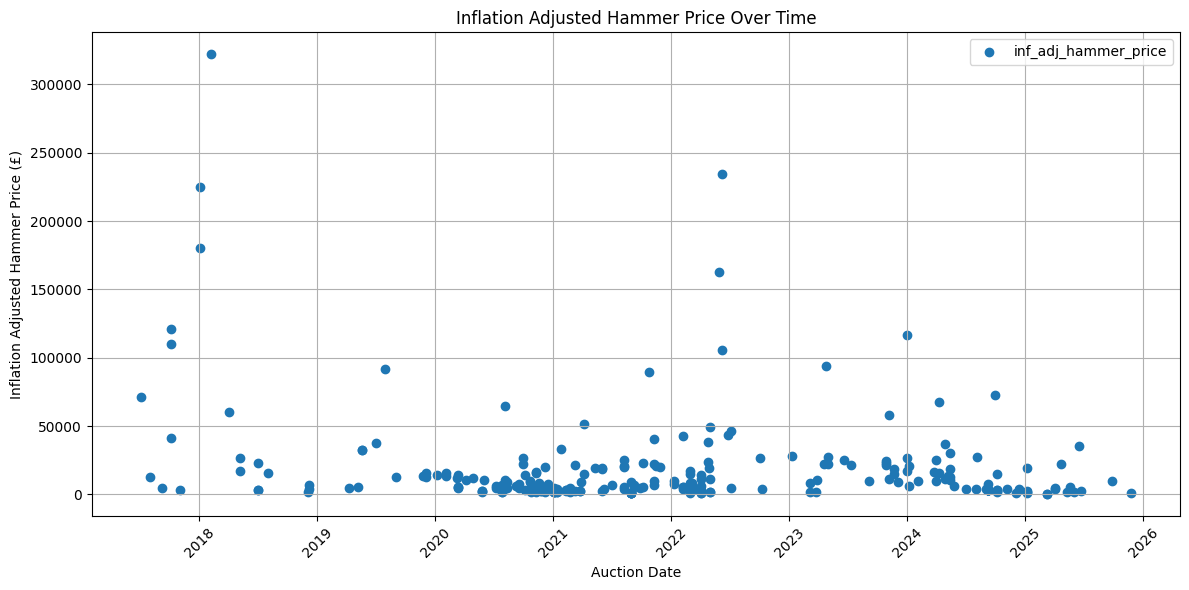

In [386]:
plt.figure(figsize=(12, 6))
plt.scatter(df['auction_date'], df['inf_adj_hammer_price'], label='inf_adj_hammer_price', marker='o')
plt.title('Inflation Adjusted Hammer Price Over Time')
plt.xlabel('Auction Date')
plt.ylabel('Inflation Adjusted Hammer Price (£)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

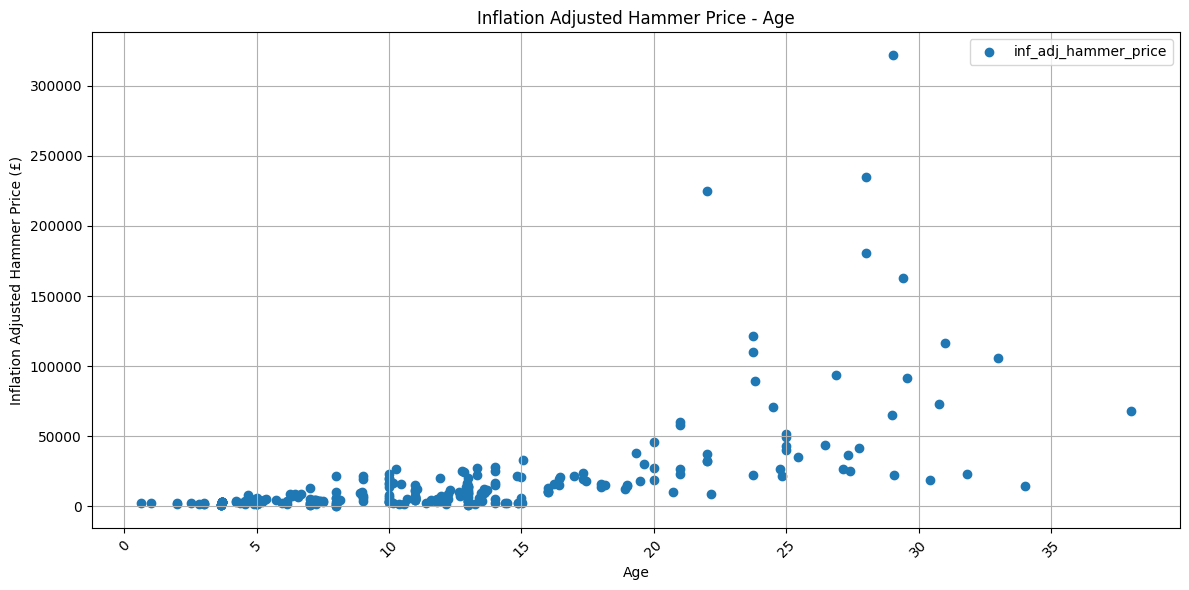

In [387]:
plt.figure(figsize=(12, 6))
plt.scatter(df['age'], df['inf_adj_hammer_price'], label='inf_adj_hammer_price', marker='o')
plt.title('Inflation Adjusted Hammer Price - Age')
plt.xlabel('Age')
plt.ylabel('Inflation Adjusted Hammer Price (£)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

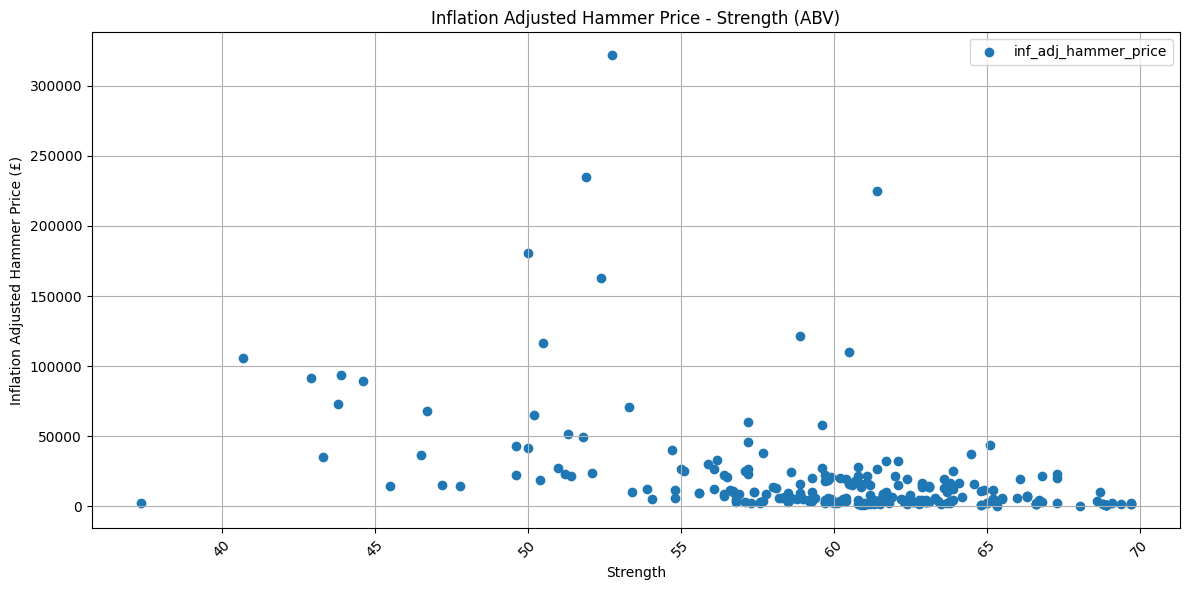

In [388]:
plt.figure(figsize=(12, 6))
plt.scatter(df['strength'], df['inf_adj_hammer_price'], label='inf_adj_hammer_price', marker='o')
plt.title('Inflation Adjusted Hammer Price - Strength (ABV)')
plt.xlabel('Strength')
plt.ylabel('Inflation Adjusted Hammer Price (£)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Data preparation

In [389]:
df.isnull().sum()

auction_date                                             0
distillery                                               1
region                                                   0
country                                                  0
strength                                                 0
rla                                                      0
bulk_litres                                              0
distillery_status                                       15
cask_type                                               20
cask_filling                                           129
previous_spirit                                         14
age                                                      0
bottles_at_cask_strength                                 0
volume_12m                                               0
volume_6m                                                0
volume_3m                                                0
inf_adj_hammer_price                                    

In [390]:
# Drop unused columns
df.drop(columns=['inf_adj_hammer_price_per_bottle_at_cask_strength'], inplace=True)

In [391]:
# Drop columns with too much NaN values
df.drop(columns=['cask_filling', 'distillery_status'], inplace=True)
df

,auction_date,distillery,region,country,strength,rla,bulk_litres,cask_type,previous_spirit,age,bottles_at_cask_strength,volume_12m,volume_6m,volume_3m,inf_adj_hammer_price,inf_adj_hammer_price_per_litre_of_alcohol,inf_adj_hammer_price_per_litre_of_alcohol_times_age
0,2025-11-23,Annandale,Lowlands,Scotland,63.5,126.17,198.70,Barrel,Bourbon,4.89,283.860000,78,12,1,1375.00,10.90,53.291194
1,2025-09-28,Bruichladdich,Islay,Scotland,53.4,66.75,125.00,Barrel,Bourbon,20.74,178.570000,112,28,6,10114.50,151.53,3142.692584
2,2025-06-22,Ardmore,Highlands,Scotland,57.6,92.62,160.80,Barrel,Bourbon,14.47,229.710000,131,61,22,2309.94,24.94,360.881363
3,2025-06-16,Springbank,Campbeltown,Scotland,43.3,57.90,131.80,Hogshead,Bourbon,25.46,188.285714,131,61,22,35151.19,607.10,15456.809972
4,2025-06-02,Tullibardine,Highlands,Scotland,69.4,109.00,157.06,Barrel,NaN,7.24,224.370000,131,61,22,1531.59,14.05,101.731299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2017-10-04,Macallan,Speyside,Scotland,58.9,58.90,141.09,Hogshead,Sherry,23.76,201.560000,7,7,5,121292.71,2059.30,48928.943796
255,2017-10-04,Littlemill,Lowlands,Scotland,50.0,50.00,85.00,Barrel,Bourbon,27.76,121.430000,7,7,5,41635.80,832.72,23116.196160
256,2017-09-06,Tullibardine,Highlands,Scotland,59.0,59.00,168.00,Barrel,Bourbon,10.68,240.000000,6,6,5,4958.21,84.04,897.520047
257,2017-08-02,Bruichladdich,Islay,Scotland,53.9,53.90,162.00,Barrel,Bourbon,13.59,231.430000,5,5,5,12498.55,231.88,3151.304165


In [392]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

auction_date                                           0
distillery                                             0
region                                                 0
country                                                0
strength                                               0
rla                                                    0
bulk_litres                                            0
cask_type                                              0
previous_spirit                                        0
age                                                    0
bottles_at_cask_strength                               0
volume_12m                                             0
volume_6m                                              0
volume_3m                                              0
inf_adj_hammer_price                                   0
inf_adj_hammer_price_per_litre_of_alcohol              0
inf_adj_hammer_price_per_litre_of_alcohol_times_age    0
dtype: int64

### Outliers filtering

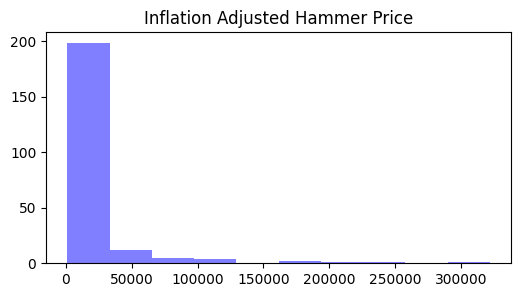

In [393]:
plt.figure(figsize=(6, 3))
plt.hist(df['inf_adj_hammer_price'], color='blue', alpha=0.5)
plt.title('Inflation Adjusted Hammer Price')
plt.show()

In [394]:
Q1 = df['inf_adj_hammer_price'].quantile(0.25)
Q3 = df['inf_adj_hammer_price'].quantile(0.75)
IQR = Q3 - Q1

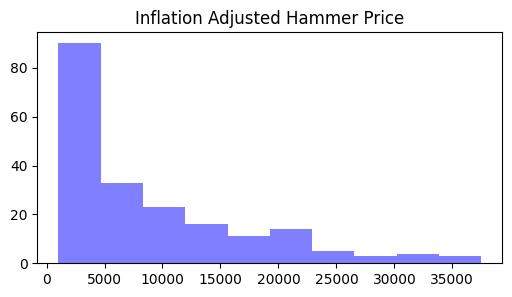

In [395]:

filtro = (df['inf_adj_hammer_price'] >= (Q1 - 1.5 * IQR)) & (df['inf_adj_hammer_price'] <= (Q3 + 1.5 * IQR))
df = df[filtro].reset_index(drop=True)
plt.figure(figsize=(6, 3))
plt.hist(df['inf_adj_hammer_price'], color='blue', alpha=0.5)
plt.title('Inflation Adjusted Hammer Price')
plt.show()

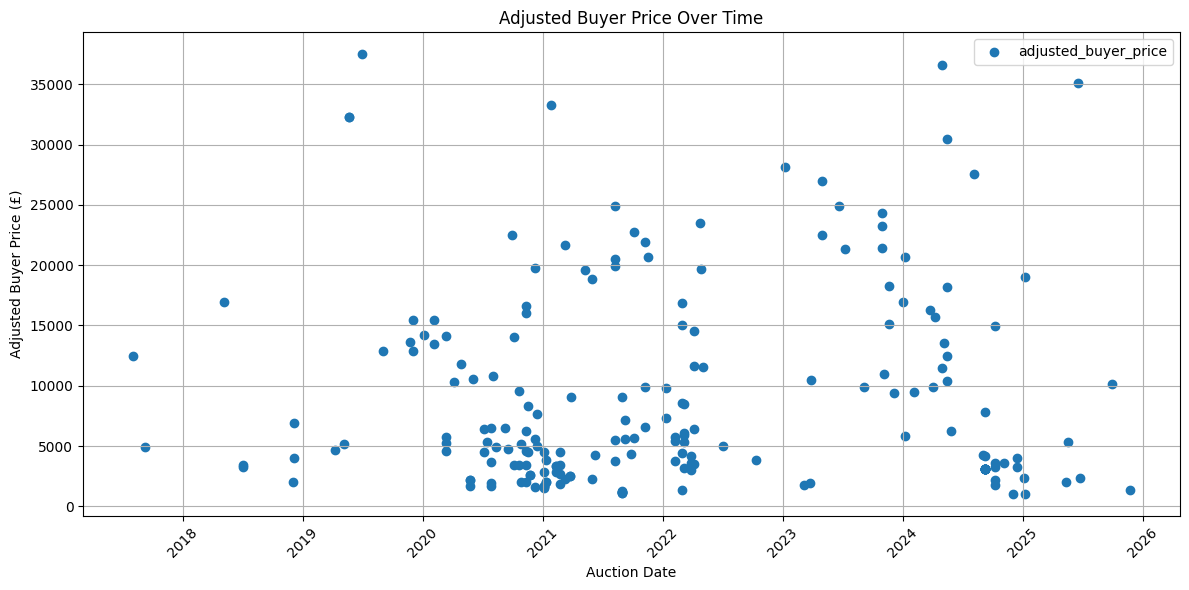

In [396]:
plt.figure(figsize=(12, 6))
plt.scatter(df['auction_date'], df['inf_adj_hammer_price'], label='adjusted_buyer_price', marker='o')
plt.title('Adjusted Buyer Price Over Time')
plt.xlabel('Auction Date')
plt.ylabel('Adjusted Buyer Price (£)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [397]:
df.drop(columns=['auction_date'], inplace=True)

### Log transformation

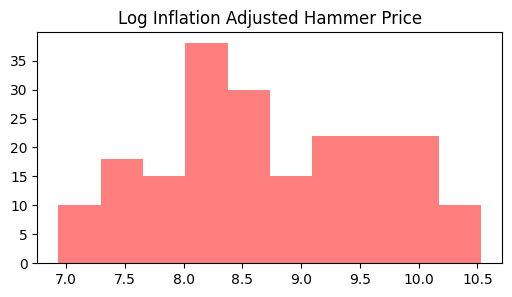

In [398]:
plt.figure(figsize=(6, 3))
plt.hist(np.log(df['inf_adj_hammer_price']), color='red', alpha=0.5)
plt.title('Log Inflation Adjusted Hammer Price')
plt.show()

### Box-Cox transformation

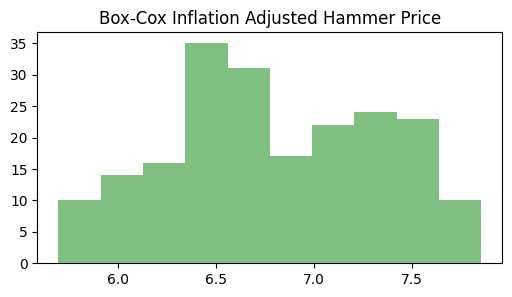

In [399]:
# Supondo que seus dados estejam em y
y_boxcox, fitted_lambda = boxcox(df['inf_adj_hammer_price'])

plt.figure(figsize=(6, 3))
plt.hist(y_boxcox, color='green', alpha=0.5)
plt.title('Box-Cox Inflation Adjusted Hammer Price')
plt.show()

# Feature selection

In [400]:
df.columns

Index(['distillery', 'region', 'country', 'strength', 'rla', 'bulk_litres',
       'cask_type', 'previous_spirit', 'age', 'bottles_at_cask_strength',
       'volume_12m', 'volume_6m', 'volume_3m', 'inf_adj_hammer_price',
       'inf_adj_hammer_price_per_litre_of_alcohol',
       'inf_adj_hammer_price_per_litre_of_alcohol_times_age'],
      dtype='object')

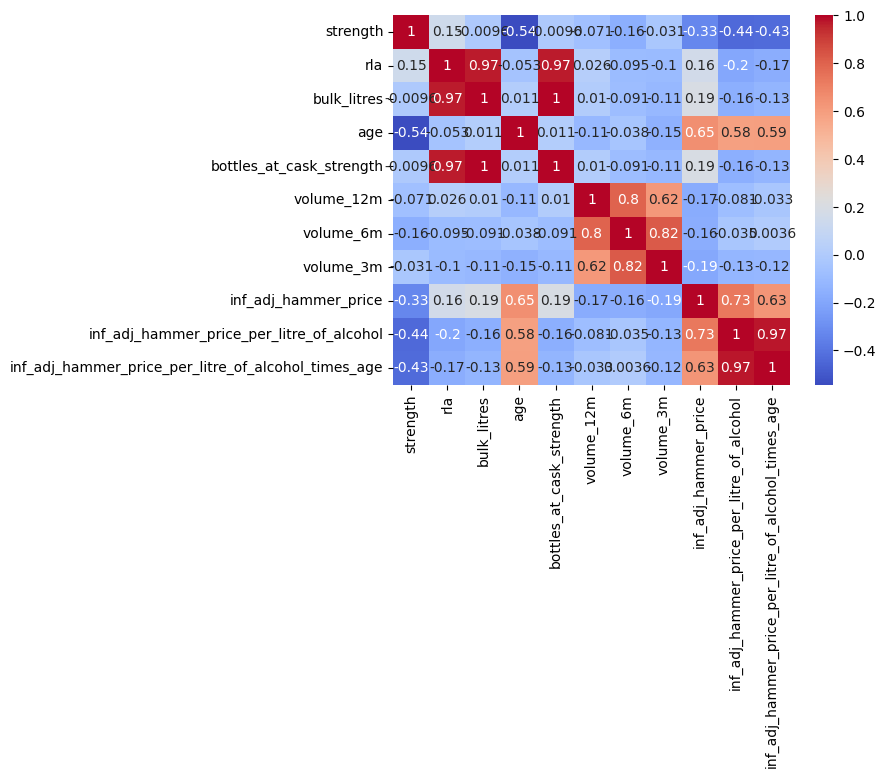

In [401]:
corr = df.drop(['distillery', 'region', 'country', 'cask_type', 'previous_spirit'], axis=1).corr(method='pearson')

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [402]:
# Drop column with high correlation to 'Rla'
df_correlation_selection = df.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])

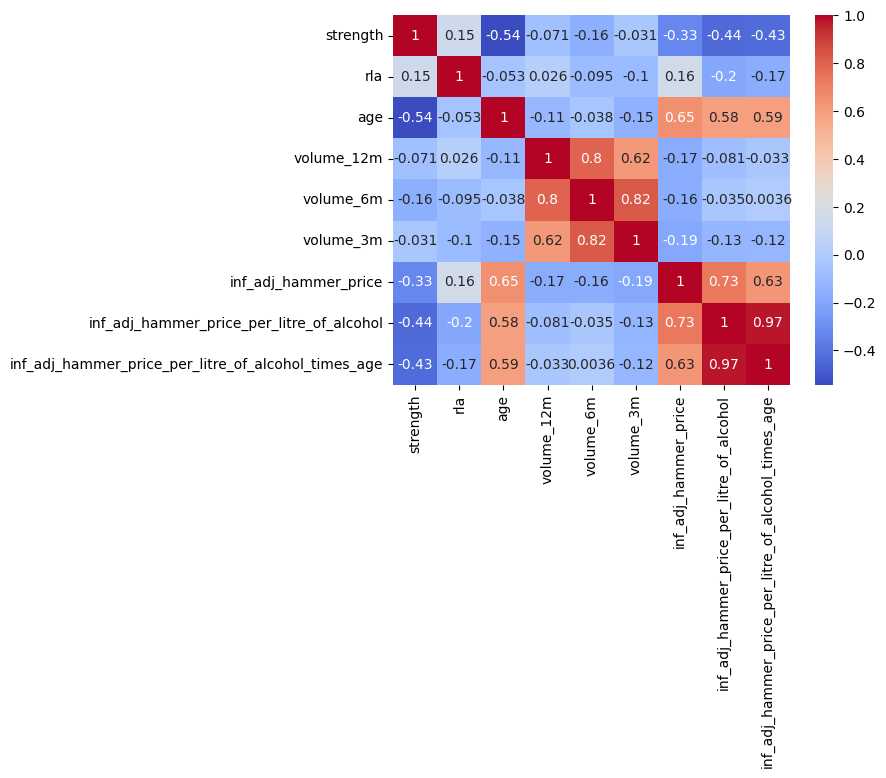

In [403]:
corr = df_correlation_selection.drop(['distillery', 'region', 'country', 'cask_type', 'previous_spirit'], axis=1).corr(method='pearson')

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### One hot encoding for categorical variables

In [404]:
df = pd.get_dummies(df, columns=['distillery', 'region', 'country', 'cask_type', 'previous_spirit'], drop_first=True, dtype=int)

In [405]:
df_correlation_selection = pd.get_dummies(df_correlation_selection,
                                          columns=['distillery', 'region', 'country', 'cask_type', 'previous_spirit'],
                                          drop_first=True, dtype=int)

In [406]:
df.columns

Index(['strength', 'rla', 'bulk_litres', 'age', 'bottles_at_cask_strength',
       'volume_12m', 'volume_6m', 'volume_3m', 'inf_adj_hammer_price',
       'inf_adj_hammer_price_per_litre_of_alcohol',
       'inf_adj_hammer_price_per_litre_of_alcohol_times_age',
       'distillery_Ardmore', 'distillery_Arran', 'distillery_Aultmore',
       'distillery_Ben Nevis', 'distillery_Benriach', 'distillery_Blair Athol',
       'distillery_Bonnington', 'distillery_Bruichladdich',
       'distillery_Bruichladdich ', 'distillery_Bunnahabhain',
       'distillery_Caol Ila', 'distillery_Caroni', 'distillery_Copper House',
       'distillery_Craigellachie', 'distillery_Dailuaine',
       'distillery_Dalmunach', 'distillery_Dingle', 'distillery_Dufftown',
       'distillery_Fettercairn', 'distillery_Girvan', 'distillery_Glasgow',
       'distillery_Glen Elgin', 'distillery_Glen Garioch',
       'distillery_Glen Moray', 'distillery_Glen Ord', 'distillery_Glen Spey',
       'distillery_Glenallachie', 'dis

In [407]:
df_correlation_selection.columns

Index(['strength', 'rla', 'age', 'volume_12m', 'volume_6m', 'volume_3m',
       'inf_adj_hammer_price', 'inf_adj_hammer_price_per_litre_of_alcohol',
       'inf_adj_hammer_price_per_litre_of_alcohol_times_age',
       'distillery_Ardmore', 'distillery_Arran', 'distillery_Aultmore',
       'distillery_Ben Nevis', 'distillery_Benriach', 'distillery_Blair Athol',
       'distillery_Bonnington', 'distillery_Bruichladdich',
       'distillery_Bruichladdich ', 'distillery_Bunnahabhain',
       'distillery_Caol Ila', 'distillery_Caroni', 'distillery_Copper House',
       'distillery_Craigellachie', 'distillery_Dailuaine',
       'distillery_Dalmunach', 'distillery_Dingle', 'distillery_Dufftown',
       'distillery_Fettercairn', 'distillery_Girvan', 'distillery_Glasgow',
       'distillery_Glen Elgin', 'distillery_Glen Garioch',
       'distillery_Glen Moray', 'distillery_Glen Ord', 'distillery_Glen Spey',
       'distillery_Glenallachie', 'distillery_Glenburgie',
       'distillery_Glenfarcla

# Split train and test data

In [408]:
x = df.drop(columns=['inf_adj_hammer_price', 'inf_adj_hammer_price_per_litre_of_alcohol_times_age', 'inf_adj_hammer_price_per_litre_of_alcohol'])

all_numeric_columns = ['strength', 'bulk_litres', 'rla', 'age', 'bottles_at_cask_strength', 'volume_12m', 'volume_6m', 'volume_3m']

In [409]:
y_standard = df['inf_adj_hammer_price']

x_train_standard, x_test_standard, y_train_standard, y_test_standard = train_test_split(x, y_standard, test_size=0.20, random_state=42)

# Log transformation
y_train_log_standard = np.log(y_train_standard)

# Box-Cox transformation
y_train_boxcox_standard, fitted_lambda_standard = boxcox(y_train_standard)

scaler_x_standard = StandardScaler()

x_train_standard_scaled = x_train_standard
x_train_standard_scaled[all_numeric_columns] = scaler_x_standard.fit_transform(x_train_standard[all_numeric_columns])

x_test_standard_scaled = x_test_standard
x_test_standard_scaled[all_numeric_columns] = scaler_x_standard.transform(x_test_standard[all_numeric_columns])

x_train_corr_sel_standard_scaled = x_train_standard_scaled.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])
x_test_corr_sel_standard_scaled = x_test_standard_scaled.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])

x_train_corr_sel_standard = x_train_standard.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])
x_test_corr_sel_standard = x_test_standard.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])

In [410]:
y_per_rla = df['inf_adj_hammer_price_per_litre_of_alcohol']

x_train_per_rla, x_test_per_rla, y_train_per_rla, y_test_per_rla = train_test_split(x, y_per_rla, test_size=0.20, random_state=42)

# Log transformation
y_train_log_per_rla = np.log(y_train_per_rla)

# Box-Cox transformation
y_train_boxcox_per_rla, fitted_lambda_per_rla = boxcox(y_train_per_rla)

scaler_x_per_rla = StandardScaler()

x_train_per_rla_scaled = x_train_per_rla
x_train_per_rla_scaled[all_numeric_columns] = scaler_x_per_rla.fit_transform(x_train_per_rla[all_numeric_columns])

x_test_per_rla_scaled = x_test_per_rla
x_test_per_rla_scaled[all_numeric_columns] = scaler_x_per_rla.transform(x_test_per_rla[all_numeric_columns])

x_train_corr_sel_per_rla_scaled = x_train_per_rla_scaled.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])
x_test_corr_sel_per_rla_scaled = x_test_per_rla_scaled.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])

x_train_corr_sel_per_rla = x_train_per_rla.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])
x_test_corr_sel_per_rla = x_test_per_rla.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])

In [411]:
y_per_rla_times_age = df['inf_adj_hammer_price_per_litre_of_alcohol_times_age']

x_train_per_rla_times_age, x_test_per_rla_times_age, y_train_per_rla_times_age, y_test_per_rla_times_age = train_test_split(x, y_per_rla_times_age, test_size=0.20, random_state=42)

# Log transformation
y_train_log_per_rla_times_age = np.log(y_train_per_rla_times_age)

# Box-Cox transformation
y_train_boxcox_per_rla_times_age, fitted_lambda_per_rla_times_age = boxcox(y_train_per_rla_times_age)

scaler_x_per_rla_times_age = StandardScaler()

x_train_per_rla_times_age_scaled = x_train_per_rla_times_age
x_train_per_rla_times_age_scaled[all_numeric_columns] = scaler_x_per_rla_times_age.fit_transform(x_train_per_rla_times_age[all_numeric_columns])

x_test_per_rla_times_age_scaled = x_test_per_rla_times_age
x_test_per_rla_times_age_scaled[all_numeric_columns] = scaler_x_per_rla_times_age.transform(x_test_per_rla_times_age[all_numeric_columns])

x_train_corr_sel_per_rla_times_age_scaled = x_train_per_rla_times_age_scaled.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])
x_test_corr_sel_per_rla_times_age_scaled = x_test_per_rla_times_age_scaled.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])

x_train_corr_sel_per_rla_times_age = x_train_per_rla_times_age.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])
x_test_corr_sel_per_rla_times_age = x_test_per_rla_times_age.drop(columns=['bulk_litres', 'bottles_at_cask_strength'])

In [412]:
models_metrics = []

# Y = Hammer Price

In [413]:
y = y_standard

x_train = x_train_standard
x_test = x_test_standard

x_train_scaled = x_train_standard_scaled
x_test_scaled = x_test_standard_scaled

y_train = y_train_standard
y_test = y_test_standard

# Log transformation
y_train_log = y_train_log_standard

# Box-Cox transformation
y_train_boxcox = y_train_boxcox_standard
fitted_lambda = fitted_lambda_standard

x_train_corr_sel = x_train_corr_sel_standard
x_test_corr_sel = x_test_corr_sel_standard

x_train_corr_sel_scaled = x_train_corr_sel_standard_scaled
x_test_corr_sel_scaled = x_test_corr_sel_standard_scaled

## ML Models - No transformation

In [414]:
features = 'All features'
transformation = 'No transformation'
y_variable = 'Inflation Adjusted Hammer Price'

### Linear Regression

In [415]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

In [416]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.62
n_rmse_range: 0.22
r2: 0.41


,Actual,Predicted,Error
0,9868.56,9257.627316,610.93
1,2170.00,7201.405643,-5031.41
2,3118.48,3424.142432,-305.66
3,3452.34,10147.817884,-6695.48
4,12857.14,15826.907509,-2969.77
5,18885.38,12432.621513,6452.76
6,23482.50,6909.949438,16572.55
7,10533.15,14785.474594,-4252.32
8,4730.98,4304.609902,426.37
9,9489.80,15645.270931,-6155.47


### Random Forest

In [417]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
176 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -4690.19
Best estimator: RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=1)


In [418]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.38
n_rmse_range: 0.13
r2: 0.78


,Actual,Predicted,Error
0,9868.56,6491.063780,3377.50
1,2170.00,4313.906046,-2143.91
2,3118.48,3275.477842,-157.00
3,3452.34,5540.588837,-2088.25
4,12857.14,12681.737555,175.40
5,18885.38,16433.190210,2452.19
6,23482.50,12688.243397,10794.26
7,10533.15,14648.165346,-4115.02
8,4730.98,5127.032628,-396.05
9,9489.80,9513.521713,-23.72


### SVM

In [419]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
Best neg_root_mean_squared_error: -8443.76
Best estimator: SVR(C=10, kernel='linear')


In [420]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.75
n_rmse_range: 0.26
r2: 0.15


,Actual,Predicted,Error
0,9868.56,6014.087717,3854.47
1,2170.00,5461.899230,-3291.90
2,3118.48,4800.543523,-1682.06
3,3452.34,6670.018897,-3217.68
4,12857.14,8295.370862,4561.77
5,18885.38,7808.795133,11076.58
6,23482.50,6692.638591,16789.86
7,10533.15,6888.643561,3644.51
8,4730.98,5535.322939,-804.34
9,9489.80,6341.663727,3148.14


### Gradient Boosting

In [421]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best neg_root_mean_squared_error: -4598.69
Best estimator: GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                          min_samples_split=10, random_state=1)


In [422]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.47
n_rmse_range: 0.16
r2: 0.67


,Actual,Predicted,Error
0,9868.56,5985.262804,3883.30
1,2170.00,1669.817635,500.18
2,3118.48,3113.786206,4.69
3,3452.34,4622.725602,-1170.39
4,12857.14,17458.362019,-4601.22
5,18885.38,15474.626368,3410.75
6,23482.50,7697.025526,15785.47
7,10533.15,16243.514405,-5710.36
8,4730.98,4116.824471,614.16
9,9489.80,11408.831646,-1919.03


## ML Models - Log transformation

In [423]:
features = 'All features'
transformation =  'Log transformation'
y_variable = 'Inflation Adjusted Hammer Price'

### Linear Regression

In [424]:
model = LinearRegression()
model.fit(x_train_scaled, y_train_log)

y_pred = model.predict(x_test_scaled)

In [425]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.60
n_rmse_range: 0.21
r2: 0.46


,Actual,Predicted,Error
0,9868.56,7280.733070,2587.83
1,2170.00,5516.536631,-3346.54
2,3118.48,3311.922617,-193.44
3,3452.34,5186.827363,-1734.49
4,12857.14,16019.451144,-3162.31
5,18885.38,15886.309465,2999.07
6,23482.50,8195.630784,15286.87
7,10533.15,13492.524561,-2959.37
8,4730.98,4441.842596,289.14
9,9489.80,15896.431911,-6406.63


### Random Forest

In [426]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best neg_root_mean_squared_error: -0.45
Best estimator: RandomForestRegressor(max_features='sqrt', min_samples_split=5, n_estimators=50,
                      random_state=1)


c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
199 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

In [427]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.50
n_rmse_range: 0.18
r2: 0.62


,Actual,Predicted,Error
0,9868.56,7021.619949,2846.94
1,2170.00,3645.970361,-1475.97
2,3118.48,3152.153293,-33.67
3,3452.34,4115.881627,-663.54
4,12857.14,12626.115978,231.02
5,18885.38,5550.139477,13335.24
6,23482.50,8450.061307,15032.44
7,10533.15,13481.697047,-2948.55
8,4730.98,4390.677769,340.30
9,9489.80,8303.998802,1185.80


### SVM

In [428]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_scaled, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Best neg_root_mean_squared_error: -0.41
Best estimator: SVR(C=10)


In [429]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.47
n_rmse_range: 0.17
r2: 0.66


,Actual,Predicted,Error
0,9868.56,5891.710255,3976.85
1,2170.00,3849.503098,-1679.50
2,3118.48,3438.008534,-319.53
3,3452.34,5798.658045,-2346.32
4,12857.14,13675.541943,-818.40
5,18885.38,9984.600976,8900.78
6,23482.50,11753.694402,11728.81
7,10533.15,12275.572444,-1742.42
8,4730.98,4242.708924,488.27
9,9489.80,8228.854008,1260.95


### Gradient Boosting

In [430]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best neg_root_mean_squared_error: -0.42
Best estimator: GradientBoostingRegressor(learning_rate=0.2, max_depth=10, min_samples_leaf=2,
                          min_samples_split=10, n_estimators=50,
                          random_state=1)


In [431]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.35
n_rmse_range: 0.12
r2: 0.82


,Actual,Predicted,Error
0,9868.56,6334.632250,3533.93
1,2170.00,4342.557764,-2172.56
2,3118.48,3045.104563,73.38
3,3452.34,3822.676246,-370.34
4,12857.14,10943.970465,1913.17
5,18885.38,26124.285664,-7238.91
6,23482.50,14964.846814,8517.65
7,10533.15,9610.478601,922.67
8,4730.98,3873.667743,857.31
9,9489.80,11218.716852,-1728.92


## ML Models - Box-Cox transformation

In [432]:
features = 'All features'
transformation =  'Box-Cox transformation'
y_variable = 'Inflation Adjusted Hammer Price'

### Linear Regression

In [433]:
model = LinearRegression()
model.fit(x_train_scaled, y_train_boxcox)

y_pred = model.predict(x_test_scaled)

In [434]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.60
n_rmse_range: 0.21
r2: 0.45


,Actual,Predicted,Error
0,9868.56,7206.762219,2661.80
1,2170.00,5472.036168,-3302.04
2,3118.48,3310.033320,-191.55
3,3452.34,5056.578868,-1604.24
4,12857.14,16059.031456,-3201.89
5,18885.38,16145.935182,2739.44
6,23482.50,8248.095843,15234.40
7,10533.15,13417.423331,-2884.27
8,4730.98,4441.191597,289.79
9,9489.80,16030.611580,-6540.81


### Random Forest

In [435]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best neg_root_mean_squared_error: -0.31
Best estimator: RandomForestRegressor(max_features='sqrt', min_samples_split=5, n_estimators=50,
                      random_state=1)


c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
175 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

In [436]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.52
n_rmse_range: 0.18
r2: 0.59


,Actual,Predicted,Error
0,9868.56,6534.555683,3334.00
1,2170.00,3715.219051,-1545.22
2,3118.48,3148.950947,-30.47
3,3452.34,4102.838280,-650.50
4,12857.14,12387.589234,469.55
5,18885.38,4975.107821,13910.27
6,23482.50,8610.571311,14871.93
7,10533.15,12791.417794,-2258.27
8,4730.98,4310.834946,420.15
9,9489.80,8658.252939,831.55


### SVM

In [437]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_scaled, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Best neg_root_mean_squared_error: -0.29
Best estimator: SVR(C=10)


In [438]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.47
n_rmse_range: 0.17
r2: 0.66


,Actual,Predicted,Error
0,9868.56,6272.385943,3596.17
1,2170.00,3768.744931,-1598.74
2,3118.48,3569.536178,-451.06
3,3452.34,5438.238757,-1985.90
4,12857.14,14550.632500,-1693.49
5,18885.38,10025.920553,8859.46
6,23482.50,11558.908166,11923.59
7,10533.15,12363.189807,-1830.04
8,4730.98,4166.404027,564.58
9,9489.80,7934.845199,1554.95


### Gradient Boosting

In [439]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best neg_root_mean_squared_error: -0.30
Best estimator: GradientBoostingRegressor(learning_rate=0.2, max_depth=10, min_samples_leaf=2,
                          min_samples_split=10, n_estimators=200,
                          random_state=1)


In [440]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.42
n_rmse_range: 0.15
r2: 0.74


,Actual,Predicted,Error
0,9868.56,6668.544922,3200.02
1,2170.00,3816.794812,-1646.79
2,3118.48,3118.230723,0.25
3,3452.34,3825.180601,-372.84
4,12857.14,10693.868824,2163.27
5,18885.38,30857.103345,-11971.72
6,23482.50,14042.190467,9440.31
7,10533.15,10375.671877,157.48
8,4730.98,3899.770186,831.21
9,9489.80,9907.483190,-417.68


## ML Models - No transformation - Correlation Selection

In [441]:
features = 'Correlation selected features'
transformation = 'No transformation'
y_variable = 'Inflation Adjusted Hammer Price'

### Linear Regression

In [442]:
model = LinearRegression()
model.fit(x_train_corr_sel_scaled, y_train)

y_pred = model.predict(x_test_corr_sel_scaled)

In [443]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.63
n_rmse_range: 0.22
r2: 0.40


,Actual,Predicted,Error
0,9868.56,9553.187627,315.37
1,2170.00,7420.696177,-5250.70
2,3118.48,3120.926382,-2.45
3,3452.34,11274.664159,-7822.32
4,12857.14,16622.775690,-3765.64
5,18885.38,12990.081852,5895.30
6,23482.50,7725.509714,15756.99
7,10533.15,15345.567582,-4812.42
8,4730.98,4675.618721,55.36
9,9489.80,14948.110923,-5458.31


### Random Forest

In [444]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best neg_root_mean_squared_error: -4452.92
Best estimator: RandomForestRegressor(max_features='log2', n_estimators=50, random_state=1)


c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
198 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

In [445]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.46
n_rmse_range: 0.16
r2: 0.67


,Actual,Predicted,Error
0,9868.56,7591.044600,2277.52
1,2170.00,5308.449800,-3138.45
2,3118.48,3136.464600,-17.98
3,3452.34,5828.349200,-2376.01
4,12857.14,13245.021200,-387.88
5,18885.38,14982.971480,3902.41
6,23482.50,9436.496200,14046.00
7,10533.15,14966.619600,-4433.47
8,4730.98,4547.913400,183.07
9,9489.80,11145.267200,-1655.47


### SVM

In [446]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel_scaled)

Best parameters: {'C': 10, 'epsilon': 0.5, 'kernel': 'linear'}
Best neg_root_mean_squared_error: -8510.96
Best estimator: SVR(C=10, epsilon=0.5, kernel='linear')


In [447]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.75
n_rmse_range: 0.26
r2: 0.16


,Actual,Predicted,Error
0,9868.56,5842.954222,4025.61
1,2170.00,4948.681917,-2778.68
2,3118.48,4151.382245,-1032.90
3,3452.34,6381.784428,-2929.44
4,12857.14,8608.660005,4248.48
5,18885.38,8354.930466,10530.45
6,23482.50,6669.674574,16812.83
7,10533.15,6779.787171,3753.36
8,4730.98,5259.562956,-528.58
9,9489.80,6064.996207,3424.80


### Gradient Boosting

In [448]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best neg_root_mean_squared_error: -4382.93
Best estimator: GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                          min_samples_split=10, n_estimators=200,
                          random_state=1)


In [449]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.42
n_rmse_range: 0.15
r2: 0.73


,Actual,Predicted,Error
0,9868.56,8462.146842,1406.41
1,2170.00,1625.186913,544.81
2,3118.48,3264.351169,-145.87
3,3452.34,4854.468901,-1402.13
4,12857.14,17655.562668,-4798.42
5,18885.38,14964.849740,3920.53
6,23482.50,11621.769123,11860.73
7,10533.15,18347.422597,-7814.27
8,4730.98,4297.411156,433.57
9,9489.80,10318.456994,-828.66


## ML Models - Log transformation - Correlation Selection

In [450]:
features = 'Correlation selected features'
transformation = 'Log transformation'
y_variable = 'Inflation Adjusted Hammer Price'

### Linear Regression

In [451]:
model = LinearRegression()
model.fit(x_train_corr_sel_scaled, y_train_log)

y_pred = model.predict(x_test_corr_sel_scaled)

In [452]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.60
n_rmse_range: 0.21
r2: 0.46


,Actual,Predicted,Error
0,9868.56,7414.309561,2454.25
1,2170.00,5611.598001,-3441.60
2,3118.48,3228.907313,-110.43
3,3452.34,5706.640589,-2254.30
4,12857.14,17295.673441,-4438.53
5,18885.38,17147.174509,1738.21
6,23482.50,8836.602313,14645.90
7,10533.15,14095.642063,-3562.49
8,4730.98,4574.604927,156.38
9,9489.80,14961.491309,-5471.69


### Random Forest

In [453]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
138 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -0.43
Best estimator: RandomForestRegressor(max_features='sqrt', random_state=1)


In [454]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.48
n_rmse_range: 0.17
r2: 0.65


,Actual,Predicted,Error
0,9868.56,6586.427948,3282.13
1,2170.00,3754.584532,-1584.58
2,3118.48,3118.480000,0.00
3,3452.34,4106.593347,-654.25
4,12857.14,13772.987202,-915.85
5,18885.38,9652.465649,9232.91
6,23482.50,8382.080693,15100.42
7,10533.15,13753.515323,-3220.37
8,4730.98,4302.417985,428.56
9,9489.80,7595.623507,1894.18


### SVM

In [455]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel_scaled, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel_scaled)

Best parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
Best neg_root_mean_squared_error: -0.41
Best estimator: SVR(C=1, kernel='linear')


In [456]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.50
n_rmse_range: 0.18
r2: 0.62


,Actual,Predicted,Error
0,9868.56,6620.959078,3247.60
1,2170.00,5527.739827,-3357.74
2,3118.48,3440.314248,-321.83
3,3452.34,4513.973067,-1061.63
4,12857.14,16443.198029,-3586.06
5,18885.38,15216.615191,3668.76
6,23482.50,7878.061608,15604.44
7,10533.15,12885.980689,-2352.83
8,4730.98,4781.713262,-50.73
9,9489.80,12247.013111,-2757.21


### Gradient Boosting

In [457]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best neg_root_mean_squared_error: -0.42
Best estimator: GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=2,
                          min_samples_split=5, n_estimators=200,
                          random_state=1)


In [458]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.31
n_rmse_range: 0.11
r2: 0.86


,Actual,Predicted,Error
0,9868.56,7460.320564,2408.24
1,2170.00,3571.463047,-1401.46
2,3118.48,3202.887614,-84.41
3,3452.34,3966.402410,-514.06
4,12857.14,11840.584012,1016.56
5,18885.38,23476.155660,-4590.78
6,23482.50,14354.768723,9127.73
7,10533.15,9659.473568,873.68
8,4730.98,4449.977246,281.00
9,9489.80,9909.558066,-419.76


## ML Models - Box-Cox transformation - Correlation Selection

In [459]:
features = 'Correlation selected features'
transformation = 'Box-Cox transformation'
y_variable = 'Inflation Adjusted Hammer Price'

### Linear Regression

In [460]:
model = LinearRegression()
model.fit(x_train_corr_sel_scaled, y_train_boxcox)

y_pred = model.predict(x_test_corr_sel_scaled)

In [461]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.60
n_rmse_range: 0.21
r2: 0.46


,Actual,Predicted,Error
0,9868.56,7339.891734,2528.67
1,2170.00,5565.286595,-3395.29
2,3118.48,3229.873583,-111.39
3,3452.34,5555.635534,-2103.30
4,12857.14,17381.127982,-4523.99
5,18885.38,17462.842299,1422.54
6,23482.50,8895.878065,14586.62
7,10533.15,14034.346707,-3501.20
8,4730.98,4571.257715,159.72
9,9489.80,15059.454659,-5569.65


### Random Forest

In [462]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
203 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -0.29
Best estimator: RandomForestRegressor(max_features='sqrt', random_state=1)


In [463]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.48
n_rmse_range: 0.17
r2: 0.65


,Actual,Predicted,Error
0,9868.56,6615.166479,3253.39
1,2170.00,4060.289387,-1890.29
2,3118.48,3118.480000,0.00
3,3452.34,3873.405313,-421.07
4,12857.14,13026.613464,-169.47
5,18885.38,9535.598973,9349.78
6,23482.50,8443.964317,15038.54
7,10533.15,12289.044986,-1755.89
8,4730.98,4216.666984,514.31
9,9489.80,6977.953704,2511.85


### SVM

In [464]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel_scaled, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel_scaled)

Best parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Best neg_root_mean_squared_error: -0.28
Best estimator: SVR(C=1)


In [465]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.47
n_rmse_range: 0.16
r2: 0.66


,Actual,Predicted,Error
0,9868.56,6161.080456,3707.48
1,2170.00,3464.860871,-1294.86
2,3118.48,3571.065426,-452.59
3,3452.34,5514.255173,-2061.92
4,12857.14,14468.252792,-1611.11
5,18885.38,10546.662097,8338.72
6,23482.50,11286.985891,12195.51
7,10533.15,12466.030123,-1932.88
8,4730.98,4314.768436,416.21
9,9489.80,8270.291453,1219.51


### Gradient Boosting

In [466]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best neg_root_mean_squared_error: -0.29
Best estimator: GradientBoostingRegressor(learning_rate=0.2, min_samples_split=10,
                          random_state=1)


In [467]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.34
n_rmse_range: 0.12
r2: 0.82


,Actual,Predicted,Error
0,9868.56,8148.594393,1719.97
1,2170.00,3107.968668,-937.97
2,3118.48,3151.265023,-32.79
3,3452.34,4384.106420,-931.77
4,12857.14,10556.963104,2300.18
5,18885.38,25580.027370,-6694.65
6,23482.50,13487.933080,9994.57
7,10533.15,14092.564242,-3559.41
8,4730.98,4180.028646,550.95
9,9489.80,11296.812619,-1807.01


# Y = HP per litre of alcohol

In [468]:
y = y_per_rla

x_train = x_train_per_rla
x_test = x_test_per_rla

x_train_scaled = x_train_per_rla_scaled
x_test_scaled = x_test_per_rla_scaled

y_train = y_train_per_rla
y_test = y_test_per_rla

# Log transformation
y_train_log = y_train_log_per_rla

# Box-Cox transformation
y_train_boxcox = y_train_boxcox_per_rla
fitted_lambda = fitted_lambda_per_rla

x_train_corr_sel = x_train_corr_sel_per_rla
x_test_corr_sel = x_test_corr_sel_per_rla

x_train_corr_sel_scaled = x_train_corr_sel_per_rla_scaled
x_test_corr_sel_scaled = x_test_corr_sel_per_rla_scaled

## ML Models - No transformation - HP per Litre of Alcohol

In [469]:
features = 'All features'
transformation = 'No transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol'

### Linear Regression

In [470]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

In [471]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.61
n_rmse_range: 0.15
r2: 0.53


,Actual,Predicted,Error
0,104.87,108.005114,-3.14
1,16.01,53.933208,-37.92
2,21.27,24.096447,-2.83
3,28.07,89.139363,-61.07
4,181.68,194.371961,-12.69
5,418.84,197.976139,220.86
6,317.63,104.629069,213.00
7,95.58,143.103094,-47.52
8,38.94,30.685196,8.25
9,97.03,161.122557,-64.09


### Random Forest

In [472]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best neg_root_mean_squared_error: -92.95
Best estimator: RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=50,
                      random_state=1)


c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
197 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

In [473]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.51
n_rmse_range: 0.13
r2: 0.66


,Actual,Predicted,Error
0,104.87,76.559181,28.31
1,16.01,34.990013,-18.98
2,21.27,22.765804,-1.50
3,28.07,35.929801,-7.86
4,181.68,193.755312,-12.08
5,418.84,209.555534,209.28
6,317.63,120.954288,196.68
7,95.58,134.148442,-38.57
8,38.94,46.048567,-7.11
9,97.03,104.758814,-7.73


### SVM

In [474]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
Best neg_root_mean_squared_error: -92.15
Best estimator: SVR(C=10, kernel='linear')


In [475]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.58
n_rmse_range: 0.14
r2: 0.57


,Actual,Predicted,Error
0,104.87,74.950600,29.92
1,16.01,39.185653,-23.18
2,21.27,20.852565,0.42
3,28.07,54.437983,-26.37
4,181.68,190.034477,-8.35
5,418.84,186.510808,232.33
6,317.63,106.344300,211.29
7,95.58,130.002203,-34.42
8,38.94,37.480120,1.46
9,97.03,101.495188,-4.47


### Gradient Boosting

In [476]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.01, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best neg_root_mean_squared_error: -101.95
Best estimator: GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_leaf=4,
                          min_samples_split=10, random_state=1)


In [477]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.50
n_rmse_range: 0.12
r2: 0.69


,Actual,Predicted,Error
0,104.87,101.048463,3.82
1,16.01,61.067658,-45.06
2,21.27,52.510815,-31.24
3,28.07,65.437575,-37.37
4,181.68,154.454334,27.23
5,418.84,372.569486,46.27
6,317.63,99.727813,217.90
7,95.58,122.806399,-27.23
8,38.94,60.357668,-21.42
9,97.03,102.260337,-5.23


## ML Models - Log transformation - HP per Litre of Alcohol

In [478]:
features = 'All features'
transformation =  'Log transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol'

### Linear Regression

In [479]:
model = LinearRegression()
model.fit(x_train_scaled, y_train_log)

y_pred = model.predict(x_test_scaled)

In [480]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.56
n_rmse_range: 0.14
r2: 0.59


,Actual,Predicted,Error
0,104.87,77.230931,27.64
1,16.01,39.457006,-23.45
2,21.27,22.526655,-1.26
3,28.07,43.756730,-15.69
4,181.68,226.597474,-44.92
5,418.84,299.404674,119.44
6,317.63,109.857789,207.77
7,95.58,124.499904,-28.92
8,38.94,37.656933,1.28
9,97.03,159.295410,-62.27


### Random Forest

In [481]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
231 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -0.46
Best estimator: RandomForestRegressor(max_features='sqrt', random_state=1)


In [482]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.60
n_rmse_range: 0.15
r2: 0.53


,Actual,Predicted,Error
0,104.87,79.546241,25.32
1,16.01,30.500487,-14.49
2,21.27,21.618825,-0.35
3,28.07,39.350330,-11.28
4,181.68,189.719523,-8.04
5,418.84,168.449575,250.39
6,317.63,107.463256,210.17
7,95.58,117.100810,-21.52
8,38.94,36.797859,2.14
9,97.03,86.538389,10.49


### SVM

In [483]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_scaled, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Best neg_root_mean_squared_error: -0.43
Best estimator: SVR(C=10)


In [484]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.59
n_rmse_range: 0.15
r2: 0.56


,Actual,Predicted,Error
0,104.87,61.203807,43.67
1,16.01,29.707220,-13.70
2,21.27,23.445397,-2.18
3,28.07,48.180027,-20.11
4,181.68,209.313634,-27.63
5,418.84,167.440022,251.40
6,317.63,162.078957,155.55
7,95.58,111.288207,-15.71
8,38.94,34.880607,4.06
9,97.03,84.541516,12.49


### Gradient Boosting

In [485]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best neg_root_mean_squared_error: -0.46
Best estimator: GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=4,
                          min_samples_split=10, n_estimators=50,
                          random_state=1)


In [486]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.40
n_rmse_range: 0.10
r2: 0.80


,Actual,Predicted,Error
0,104.87,79.506634,25.36
1,16.01,12.857606,3.15
2,21.27,22.317008,-1.05
3,28.07,36.854994,-8.78
4,181.68,210.861237,-29.18
5,418.84,367.456980,51.38
6,317.63,148.560447,169.07
7,95.58,102.561289,-6.98
8,38.94,36.806453,2.13
9,97.03,96.722889,0.31


## ML Models - Box-Cox transformation - HP per Litre of Alcohol

In [487]:
features = 'All features'
transformation =  'Box-Cox transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol'

### Linear Regression

In [488]:
model = LinearRegression()
model.fit(x_train_scaled, y_train_boxcox)

y_pred = model.predict(x_test_scaled)

In [489]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.56
n_rmse_range: 0.14
r2: 0.60


,Actual,Predicted,Error
0,104.87,74.654376,30.22
1,16.01,38.427755,-22.42
2,21.27,22.504063,-1.23
3,28.07,41.130556,-13.06
4,181.68,239.236909,-57.56
5,418.84,358.083693,60.76
6,317.63,112.708259,204.92
7,95.58,121.134425,-25.55
8,38.94,37.752429,1.19
9,97.03,161.846945,-64.82


### Random Forest

In [490]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
254 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -0.26
Best estimator: RandomForestRegressor(max_features='sqrt', random_state=1)


In [491]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.63
n_rmse_range: 0.16
r2: 0.49


,Actual,Predicted,Error
0,104.87,80.011259,24.86
1,16.01,28.728066,-12.72
2,21.27,21.444916,-0.17
3,28.07,41.202639,-13.13
4,181.68,186.414689,-4.73
5,418.84,165.211733,253.63
6,317.63,94.282351,223.35
7,95.58,117.647074,-22.07
8,38.94,35.645528,3.29
9,97.03,86.918562,10.11


### SVM

In [492]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_scaled, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Best neg_root_mean_squared_error: -0.25
Best estimator: SVR(C=10)


In [493]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.60
n_rmse_range: 0.15
r2: 0.54


,Actual,Predicted,Error
0,104.87,61.905625,42.96
1,16.01,27.926326,-11.92
2,21.27,24.568777,-3.30
3,28.07,44.272502,-16.20
4,181.68,227.979187,-46.30
5,418.84,151.493798,267.35
6,317.63,157.035410,160.59
7,95.58,114.081567,-18.50
8,38.94,33.865358,5.07
9,97.03,81.349584,15.68


### Gradient Boosting

In [494]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -0.26
Best estimator: GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=4,
                          random_state=1)


In [495]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.43
n_rmse_range: 0.11
r2: 0.76


,Actual,Predicted,Error
0,104.87,83.430967,21.44
1,16.01,24.394932,-8.38
2,21.27,21.844859,-0.57
3,28.07,36.156670,-8.09
4,181.68,202.907436,-21.23
5,418.84,422.771490,-3.93
6,317.63,139.261074,178.37
7,95.58,115.420885,-19.84
8,38.94,34.216547,4.72
9,97.03,102.233013,-5.20


## ML Models - No transformation - Correlation Selection - HP per Litre of Alcohol

In [496]:
features = 'Correlation selected features'
transformation = 'No transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol'

### Linear Regression

In [497]:
model = LinearRegression()
model.fit(x_train_corr_sel_scaled, y_train)

y_pred = model.predict(x_test_corr_sel_scaled)

In [498]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.59
n_rmse_range: 0.15
r2: 0.56


,Actual,Predicted,Error
0,104.87,109.776383,-4.91
1,16.01,56.311605,-40.30
2,21.27,20.286707,0.98
3,28.07,103.643567,-75.57
4,181.68,207.337476,-25.66
5,418.84,213.770327,205.07
6,317.63,116.954274,200.68
7,95.58,149.205047,-53.63
8,38.94,34.870421,4.07
9,97.03,151.697593,-54.67


### Random Forest

In [499]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best neg_root_mean_squared_error: -93.06
Best estimator: RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=50,
                      random_state=1)


c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

In [500]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.49
n_rmse_range: 0.12
r2: 0.69


,Actual,Predicted,Error
0,104.87,83.720630,21.15
1,16.01,43.952706,-27.94
2,21.27,23.428758,-2.16
3,28.07,42.142184,-14.07
4,181.68,195.919428,-14.24
5,418.84,330.500384,88.34
6,317.63,85.945186,231.68
7,95.58,142.431208,-46.85
8,38.94,47.588751,-8.65
9,97.03,92.312936,4.72


### SVM

In [501]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel_scaled)

Best parameters: {'C': 10, 'epsilon': 0.5, 'kernel': 'linear'}
Best neg_root_mean_squared_error: -91.87
Best estimator: SVR(C=10, epsilon=0.5, kernel='linear')


In [502]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.58
n_rmse_range: 0.14
r2: 0.57


,Actual,Predicted,Error
0,104.87,75.157458,29.71
1,16.01,39.063799,-23.05
2,21.27,20.662802,0.61
3,28.07,54.160204,-26.09
4,181.68,191.588666,-9.91
5,418.84,185.329609,233.51
6,317.63,106.241572,211.39
7,95.58,131.272606,-35.69
8,38.94,38.070309,0.87
9,97.03,101.658279,-4.63


### Gradient Boosting

In [503]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

Best parameters: {'learning_rate': 0.01, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best neg_root_mean_squared_error: -101.69
Best estimator: GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_leaf=4,
                          min_samples_split=10, random_state=1)


In [504]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.50
n_rmse_range: 0.12
r2: 0.68


,Actual,Predicted,Error
0,104.87,101.298191,3.57
1,16.01,60.994760,-44.98
2,21.27,52.602054,-31.33
3,28.07,66.187206,-38.12
4,181.68,154.036481,27.64
5,418.84,375.246406,43.59
6,317.63,100.702175,216.93
7,95.58,125.886841,-30.31
8,38.94,60.406712,-21.47
9,97.03,102.226419,-5.20


## ML Models - Log transformation - Correlation Selection - HP per Litre of Alcohol

In [505]:
features = 'Correlation selected features'
transformation = 'Log transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol'

### Linear Regression

In [506]:
model = LinearRegression()
model.fit(x_train_corr_sel_scaled, y_train_log)

y_pred = model.predict(x_test_corr_sel_scaled)

In [507]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.55
n_rmse_range: 0.14
r2: 0.61


,Actual,Predicted,Error
0,104.87,77.560444,27.31
1,16.01,39.916383,-23.91
2,21.27,22.077808,-0.81
3,28.07,47.284273,-19.21
4,181.68,244.559304,-62.88
5,418.84,333.057353,85.78
6,317.63,117.890442,199.74
7,95.58,128.263268,-32.68
8,38.94,38.450683,0.49
9,97.03,151.293559,-54.26


### Random Forest

In [508]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best neg_root_mean_squared_error: -0.46
Best estimator: RandomForestRegressor(max_features='log2', n_estimators=50, random_state=1)


c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
179 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

In [509]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.62
n_rmse_range: 0.15
r2: 0.51


,Actual,Predicted,Error
0,104.87,75.272911,29.60
1,16.01,35.552744,-19.54
2,21.27,21.341227,-0.07
3,28.07,36.789264,-8.72
4,181.68,189.270150,-7.59
5,418.84,148.869203,269.97
6,317.63,108.580015,209.05
7,95.58,136.966916,-41.39
8,38.94,36.153424,2.79
9,97.03,87.130218,9.90


### SVM

In [510]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel_scaled, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel_scaled)

Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Best neg_root_mean_squared_error: -0.42
Best estimator: SVR(C=10)


In [511]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.61
n_rmse_range: 0.15
r2: 0.52


,Actual,Predicted,Error
0,104.87,62.607675,42.26
1,16.01,29.024294,-13.01
2,21.27,23.463107,-2.19
3,28.07,45.559784,-17.49
4,181.68,230.457488,-48.78
5,418.84,145.659830,273.18
6,317.63,165.160279,152.47
7,95.58,110.589601,-15.01
8,38.94,34.449767,4.49
9,97.03,83.466399,13.56


### Gradient Boosting

In [512]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best neg_root_mean_squared_error: -0.45
Best estimator: GradientBoostingRegressor(min_samples_leaf=4, n_estimators=50, random_state=1)


In [513]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.41
n_rmse_range: 0.10
r2: 0.79


,Actual,Predicted,Error
0,104.87,78.343676,26.53
1,16.01,15.917127,0.09
2,21.27,22.435350,-1.17
3,28.07,35.054484,-6.98
4,181.68,223.686433,-42.01
5,418.84,381.911493,36.93
6,317.63,139.619547,178.01
7,95.58,91.050357,4.53
8,38.94,38.748540,0.19
9,97.03,84.487431,12.54


## ML Models - Box-Cox transformation - Correlation Selection - HP per Litre of Alcohol

In [514]:
features = 'Correlation selected features'
transformation = 'Box-Cox transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol'

### Linear Regression

In [515]:
model = LinearRegression()
model.fit(x_train_corr_sel_scaled, y_train_boxcox)

y_pred = model.predict(x_test_corr_sel_scaled)

In [516]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.56
n_rmse_range: 0.14
r2: 0.60


,Actual,Predicted,Error
0,104.87,74.930882,29.94
1,16.01,38.805541,-22.80
2,21.27,22.148942,-0.88
3,28.07,43.967153,-15.90
4,181.68,259.952035,-78.27
5,418.84,405.059059,13.78
6,317.63,120.818258,196.81
7,95.58,124.733711,-29.15
8,38.94,38.423571,0.52
9,97.03,153.544457,-56.51


### Random Forest

In [517]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
163 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -0.26
Best estimator: RandomForestRegressor(max_features='sqrt', random_state=1)


In [518]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.59
n_rmse_range: 0.15
r2: 0.55


,Actual,Predicted,Error
0,104.87,73.096330,31.77
1,16.01,33.681940,-17.67
2,21.27,21.316117,-0.05
3,28.07,39.717899,-11.65
4,181.68,184.127610,-2.45
5,418.84,172.690334,246.15
6,317.63,107.098560,210.53
7,95.58,121.419684,-25.84
8,38.94,36.618275,2.32
9,97.03,102.447401,-5.42


### SVM

In [519]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel_scaled, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel_scaled)

Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Best neg_root_mean_squared_error: -0.25
Best estimator: SVR(C=10)


In [520]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.60
n_rmse_range: 0.15
r2: 0.54


,Actual,Predicted,Error
0,104.87,62.284743,42.59
1,16.01,27.106132,-11.10
2,21.27,24.615569,-3.35
3,28.07,40.519890,-12.45
4,181.68,212.391768,-30.71
5,418.84,141.930125,276.91
6,317.63,157.706275,159.92
7,95.58,114.480483,-18.90
8,38.94,33.972571,4.97
9,97.03,83.411388,13.62


### Gradient Boosting

In [521]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -0.26
Best estimator: GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=4,
                          random_state=1)


In [522]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.49
n_rmse_range: 0.12
r2: 0.70


,Actual,Predicted,Error
0,104.87,82.909168,21.96
1,16.01,23.982232,-7.97
2,21.27,21.807496,-0.54
3,28.07,37.181339,-9.11
4,181.68,191.039912,-9.36
5,418.84,329.257047,89.58
6,317.63,115.066799,202.56
7,95.58,96.977582,-1.40
8,38.94,33.967553,4.97
9,97.03,100.019262,-2.99


# Y = HP per litre of alcohol Times Age

In [523]:
y = y_per_rla_times_age

x_train = x_train_per_rla_times_age
x_test = x_test_per_rla_times_age

x_train_scaled = x_train_per_rla_times_age_scaled
x_test_scaled = x_test_per_rla_times_age_scaled

y_train = y_train_per_rla_times_age
y_test = y_test_per_rla_times_age

# Log transformation
y_train_log = y_train_log_per_rla_times_age

# Box-Cox transformation
y_train_boxcox = y_train_boxcox_per_rla_times_age
fitted_lambda = fitted_lambda_per_rla_times_age

x_train_corr_sel = x_train_corr_sel_per_rla_times_age
x_test_corr_sel = x_test_corr_sel_per_rla_times_age

x_train_corr_sel_scaled = x_train_corr_sel_per_rla_times_age_scaled
x_test_corr_sel_scaled = x_test_corr_sel_per_rla_times_age_scaled

## ML Models - No transformation - HP per Litre of Alcohol Times Age

In [524]:
features = 'All features'
transformation = 'No transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

### Linear Regression

In [525]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

In [526]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.98
n_rmse_range: 0.11
r2: 0.59


,Actual,Predicted,Error
0,1363.350478,1395.756452,-32.41
1,224.090876,913.458368,-689.37
2,78.493801,91.170108,-12.68
3,364.911131,1082.611086,-717.70
4,2906.800057,2986.325622,-79.53
5,12736.846436,5026.092435,7710.75
6,5498.202015,1852.636793,3645.57
7,764.656987,1346.855727,-582.20
8,198.584346,-51.131383,249.72
9,1308.001063,2157.044304,-849.04


### Random Forest

In [527]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
163 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best neg_root_mean_squared_error: -2280.65
Best estimator: RandomForestRegressor(max_features='log2', n_estimators=200, random_state=1)


In [528]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.82
n_rmse_range: 0.09
r2: 0.71


,Actual,Predicted,Error
0,1363.350478,1088.394589,274.96
1,224.090876,507.814124,-283.72
2,78.493801,80.348257,-1.85
3,364.911131,562.795220,-197.88
4,2906.800057,2900.112326,6.69
5,12736.846436,6151.259786,6585.59
6,5498.202015,2248.591215,3249.61
7,764.656987,1418.897062,-654.24
8,198.584346,291.421480,-92.84
9,1308.001063,1604.418099,-296.42


### SVM

In [529]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
Best neg_root_mean_squared_error: -2773.49
Best estimator: SVR(C=10, kernel='linear')


In [530]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 1.23
n_rmse_range: 0.14
r2: 0.35


,Actual,Predicted,Error
0,1363.350478,1131.417997,231.93
1,224.090876,842.324957,-618.23
2,78.493801,72.390927,6.10
3,364.911131,990.569199,-625.66
4,2906.800057,2208.829402,697.97
5,12736.846436,2808.839980,9928.01
6,5498.202015,1685.425590,3812.78
7,764.656987,1238.391470,-473.73
8,198.584346,303.368086,-104.78
9,1308.001063,1296.815429,11.19


### Gradient Boosting

In [531]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.01, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -2380.61
Best estimator: GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_leaf=4,
                          random_state=1)


In [532]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.51
n_rmse_range: 0.06
r2: 0.89


,Actual,Predicted,Error
0,1363.350478,1322.226441,41.12
1,224.090876,800.962309,-576.87
2,78.493801,654.243471,-575.75
3,364.911131,882.465921,-517.55
4,2906.800057,2926.304979,-19.50
5,12736.846436,10827.968946,1908.88
6,5498.202015,3140.651499,2357.55
7,764.656987,1338.847353,-574.19
8,198.584346,719.757188,-521.17
9,1308.001063,1416.052904,-108.05


## ML Models - Log transformation - HP per Litre of Alcohol Times Age

In [533]:
features = 'All features'
transformation =  'Log transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

### Linear Regression

In [534]:
model = LinearRegression()
model.fit(x_train_scaled, y_train_log)

y_pred = model.predict(x_test_scaled)

In [535]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.57
n_rmse_range: 0.06
r2: 0.86


,Actual,Predicted,Error
0,1363.350478,1013.689187,349.66
1,224.090876,507.764073,-283.67
2,78.493801,85.073150,-6.58
3,364.911131,610.116947,-245.21
4,2906.800057,3706.629885,-799.83
5,12736.846436,14233.414769,-1496.57
6,5498.202015,2227.318628,3270.88
7,764.656987,1003.534293,-238.88
8,198.584346,198.497919,0.09
9,1308.001063,2183.709147,-875.71


### Random Forest

In [536]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
229 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -0.60
Best estimator: RandomForestRegressor(max_features='sqrt', random_state=1)


In [537]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 1.31
n_rmse_range: 0.15
r2: 0.25


,Actual,Predicted,Error
0,1363.350478,854.288753,509.06
1,224.090876,266.666890,-42.58
2,78.493801,79.097952,-0.60
3,364.911131,529.165289,-164.25
4,2906.800057,2609.652124,297.15
5,12736.846436,1695.458215,11041.39
6,5498.202015,1504.820132,3993.38
7,764.656987,1130.465660,-365.81
8,198.584346,191.099243,7.49
9,1308.001063,1031.404463,276.60


### SVM

In [538]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_scaled, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

Best parameters: {'C': 1, 'epsilon': 0.2, 'kernel': 'linear'}
Best neg_root_mean_squared_error: -0.49
Best estimator: SVR(C=1, epsilon=0.2, kernel='linear')


In [539]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.56
n_rmse_range: 0.06
r2: 0.86


,Actual,Predicted,Error
0,1363.350478,730.558970,632.79
1,224.090876,479.869462,-255.78
2,78.493801,95.559618,-17.07
3,364.911131,454.937264,-90.03
4,2906.800057,3909.021525,-1002.22
5,12736.846436,13798.924798,-1062.08
6,5498.202015,1846.866283,3651.34
7,764.656987,951.431139,-186.77
8,198.584346,231.553699,-32.97
9,1308.001063,1768.251847,-460.25


### Gradient Boosting

In [540]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best neg_root_mean_squared_error: -0.47
Best estimator: GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=2,
                          min_samples_split=5, n_estimators=200,
                          random_state=1)


In [541]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.67
n_rmse_range: 0.08
r2: 0.80


,Actual,Predicted,Error
0,1363.350478,1170.636066,192.71
1,224.090876,318.119300,-94.03
2,78.493801,76.121198,2.37
3,364.911131,493.058721,-128.15
4,2906.800057,2778.234515,128.57
5,12736.846436,7387.441735,5349.40
6,5498.202015,3490.447560,2007.75
7,764.656987,502.974967,261.68
8,198.584346,160.893208,37.69
9,1308.001063,1572.406363,-264.41


## ML Models - Box-Cox transformation - HP per Litre of Alcohol Times Age

In [542]:
features = 'All features'
transformation =  'Box-Cox transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

### Linear Regression

In [543]:
model = LinearRegression()
model.fit(x_train_scaled, y_train_boxcox)

y_pred = model.predict(x_test_scaled)

In [544]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.68
n_rmse_range: 0.08
r2: 0.80


,Actual,Predicted,Error
0,1363.350478,1001.165493,362.18
1,224.090876,498.158674,-274.07
2,78.493801,85.144712,-6.65
3,364.911131,600.653992,-235.74
4,2906.800057,3810.550671,-903.75
5,12736.846436,16419.237082,-3682.39
6,5498.202015,2303.663360,3194.54
7,764.656987,983.212136,-218.56
8,198.584346,200.194070,-1.61
9,1308.001063,2205.588870,-897.59


### Random Forest

In [545]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
237 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best neg_root_mean_squared_error: -0.47
Best estimator: RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=1)


In [546]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 1.31
n_rmse_range: 0.15
r2: 0.25


,Actual,Predicted,Error
0,1363.350478,863.162572,500.19
1,224.090876,315.327946,-91.24
2,78.493801,79.120730,-0.63
3,364.911131,526.352755,-161.44
4,2906.800057,2605.865928,300.93
5,12736.846436,1746.348189,10990.50
6,5498.202015,1421.881910,4076.32
7,764.656987,1052.047855,-287.39
8,198.584346,196.230723,2.35
9,1308.001063,1088.178792,219.82


### SVM

In [547]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_scaled, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_scaled)

Best parameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'linear'}
Best neg_root_mean_squared_error: -0.38
Best estimator: SVR(C=10, epsilon=0.2, kernel='linear')


In [548]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.79
n_rmse_range: 0.09
r2: 0.73


,Actual,Predicted,Error
0,1363.350478,928.107599,435.24
1,224.090876,463.506729,-239.42
2,78.493801,99.325815,-20.83
3,364.911131,575.572878,-210.66
4,2906.800057,4097.483936,-1190.68
5,12736.846436,18254.819889,-5517.97
6,5498.202015,2409.387269,3088.81
7,764.656987,961.071011,-196.41
8,198.584346,235.985338,-37.40
9,1308.001063,2081.955362,-773.95


### Gradient Boosting

In [549]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best neg_root_mean_squared_error: -0.36
Best estimator: GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                          n_estimators=50, random_state=1)


In [550]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.48
n_rmse_range: 0.05
r2: 0.90


,Actual,Predicted,Error
0,1363.350478,1014.320178,349.03
1,224.090876,290.439004,-66.35
2,78.493801,79.324843,-0.83
3,364.911131,545.849567,-180.94
4,2906.800057,3288.466701,-381.67
5,12736.846436,9678.902258,3057.94
6,5498.202015,3262.430667,2235.77
7,764.656987,642.834596,121.82
8,198.584346,174.991969,23.59
9,1308.001063,1283.263555,24.74


## ML Models - No transformation - Correlation Selection - HP per Litre of Alcohol Times Age

In [551]:
features = 'Correlation selected features'
transformation = 'No transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

### Linear Regression

In [552]:
model = LinearRegression()
model.fit(x_train_corr_sel_scaled, y_train)

y_pred = model.predict(x_test_corr_sel_scaled)

In [553]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.96
n_rmse_range: 0.11
r2: 0.60


,Actual,Predicted,Error
0,1363.350478,1460.646939,-97.30
1,224.090876,963.907587,-739.82
2,78.493801,20.285192,58.21
3,364.911131,1346.790797,-981.88
4,2906.800057,3178.801832,-272.00
5,12736.846436,5175.442607,7561.40
6,5498.202015,2047.794783,3450.41
7,764.656987,1475.767783,-711.11
8,198.584346,34.570828,164.01
9,1308.001063,1992.623608,-684.62


### Random Forest

In [554]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
147 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -2241.49
Best estimator: RandomForestRegressor(max_features='sqrt', random_state=1)


In [555]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.74
n_rmse_range: 0.08
r2: 0.76


,Actual,Predicted,Error
0,1363.350478,1046.702509,316.65
1,224.090876,578.430981,-354.34
2,78.493801,78.667532,-0.17
3,364.911131,669.792949,-304.88
4,2906.800057,2814.048284,92.75
5,12736.846436,7012.016211,5724.83
6,5498.202015,2496.151210,3002.05
7,764.656987,1455.443609,-690.79
8,198.584346,279.665577,-81.08
9,1308.001063,1450.430852,-142.43


### SVM

In [556]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel_scaled)

Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
Best neg_root_mean_squared_error: -2773.78
Best estimator: SVR(C=10, kernel='linear')


In [557]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 1.23
n_rmse_range: 0.14
r2: 0.35


,Actual,Predicted,Error
0,1363.350478,1140.147156,223.20
1,224.090876,845.978849,-621.89
2,78.493801,72.396111,6.10
3,364.911131,990.634811,-625.72
4,2906.800057,2203.446289,703.35
5,12736.846436,2795.150554,9941.70
6,5498.202015,1690.720718,3807.48
7,764.656987,1242.685337,-478.03
8,198.584346,311.613155,-113.03
9,1308.001063,1303.488013,4.51


### Gradient Boosting

In [558]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

Best parameters: {'learning_rate': 0.01, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -2376.69
Best estimator: GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_leaf=4,
                          random_state=1)


In [559]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.53
n_rmse_range: 0.06
r2: 0.88


,Actual,Predicted,Error
0,1363.350478,1330.856288,32.49
1,224.090876,809.541735,-585.45
2,78.493801,652.312959,-573.82
3,364.911131,907.306514,-542.40
4,2906.800057,2959.516015,-52.72
5,12736.846436,10914.574207,1822.27
6,5498.202015,2928.203630,2570.00
7,764.656987,1341.905795,-577.25
8,198.584346,720.704979,-522.12
9,1308.001063,1413.722065,-105.72


## ML Models - Log transformation - Correlation Selection - HP per Litre of Alcohol Times Age

In [560]:
features = 'Correlation selected features'
transformation = 'Log transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

### Linear Regression

In [561]:
model = LinearRegression()
model.fit(x_train_corr_sel_scaled, y_train_log)

y_pred = model.predict(x_test_corr_sel_scaled)

In [562]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.64
n_rmse_range: 0.07
r2: 0.82


,Actual,Predicted,Error
0,1363.350478,1011.808911,351.54
1,224.090876,511.996879,-287.91
2,78.493801,83.704543,-5.21
3,364.911131,650.063260,-285.15
4,2906.800057,3973.578325,-1066.78
5,12736.846436,15884.692036,-3147.85
6,5498.202015,2371.023317,3127.18
7,764.656987,1025.293831,-260.64
8,198.584346,201.601088,-3.02
9,1308.001063,2091.083749,-783.08


### Random Forest

In [563]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
167 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best neg_root_mean_squared_error: -0.59
Best estimator: RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=1)


In [564]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 1.28
n_rmse_range: 0.15
r2: 0.30


,Actual,Predicted,Error
0,1363.350478,902.008580,461.34
1,224.090876,352.016377,-127.93
2,78.493801,79.157269,-0.66
3,364.911131,513.351840,-148.44
4,2906.800057,2697.797274,209.00
5,12736.846436,2073.735341,10663.11
6,5498.202015,1467.476626,4030.73
7,764.656987,1057.036218,-292.38
8,198.584346,196.239731,2.34
9,1308.001063,1236.991582,71.01


### SVM

In [565]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel_scaled, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel_scaled)

Best parameters: {'C': 1, 'epsilon': 0.2, 'kernel': 'linear'}
Best neg_root_mean_squared_error: -0.48
Best estimator: SVR(C=1, epsilon=0.2, kernel='linear')


In [566]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.56
n_rmse_range: 0.06
r2: 0.86


,Actual,Predicted,Error
0,1363.350478,729.034577,634.32
1,224.090876,479.700744,-255.61
2,78.493801,95.583611,-17.09
3,364.911131,455.820819,-90.91
4,2906.800057,3911.464344,-1004.66
5,12736.846436,13870.059183,-1133.21
6,5498.202015,1829.457365,3668.74
7,764.656987,953.899173,-189.24
8,198.584346,231.585455,-33.00
9,1308.001063,1761.970883,-453.97


### Gradient Boosting

In [567]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best neg_root_mean_squared_error: -0.47
Best estimator: GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                          min_samples_split=10, n_estimators=200,
                          random_state=1)


In [568]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.84
n_rmse_range: 0.10
r2: 0.69


,Actual,Predicted,Error
0,1363.350478,971.864304,391.49
1,224.090876,323.568126,-99.48
2,78.493801,78.085083,0.41
3,364.911131,513.324688,-148.41
4,2906.800057,2898.596609,8.20
5,12736.846436,5494.464783,7242.38
6,5498.202015,3967.060010,1531.14
7,764.656987,357.089810,407.57
8,198.584346,162.750411,35.83
9,1308.001063,1463.686746,-155.69


## ML Models - Box-Cox transformation - Correlation Selection - HP per Litre of Alcohol Times Age

In [569]:
features = 'Correlation selected features'
transformation = 'Box-Cox transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

### Linear Regression

In [570]:
model = LinearRegression()
model.fit(x_train_corr_sel_scaled, y_train_boxcox)

y_pred = model.predict(x_test_corr_sel_scaled)

In [571]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Linear Regression',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.84
n_rmse_range: 0.10
r2: 0.70


,Actual,Predicted,Error
0,1363.350478,997.673817,365.68
1,224.090876,501.763857,-277.67
2,78.493801,83.982671,-5.49
3,364.911131,636.788025,-271.88
4,2906.800057,4092.490166,-1185.69
5,12736.846436,18579.653035,-5842.81
6,5498.202015,2451.876731,3046.33
7,764.656987,1002.249525,-237.59
8,198.584346,202.853169,-4.27
9,1308.001063,2114.158091,-806.16


### Random Forest

In [572]:
model = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
235 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\joaov\Documents\Casks Valuation\venv\lib\site-packages\sklearn\base.py", line 469, in _validate_params

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best neg_root_mean_squared_error: -0.45
Best estimator: RandomForestRegressor(max_features='sqrt', random_state=1)


In [573]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Random Forest',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 1.26
n_rmse_range: 0.14
r2: 0.32


,Actual,Predicted,Error
0,1363.350478,875.389197,487.96
1,224.090876,366.646274,-142.56
2,78.493801,79.103157,-0.61
3,364.911131,571.374342,-206.46
4,2906.800057,2748.507406,158.29
5,12736.846436,2196.663598,10540.18
6,5498.202015,1600.227998,3897.97
7,764.656987,1073.106601,-308.45
8,198.584346,198.491938,0.09
9,1308.001063,1302.195910,5.81


### SVM

In [574]:
model = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel_scaled, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel_scaled)

Best parameters: {'C': 1, 'epsilon': 0.2, 'kernel': 'linear'}
Best neg_root_mean_squared_error: -0.38
Best estimator: SVR(C=1, epsilon=0.2, kernel='linear')


In [575]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'SVM',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.59
n_rmse_range: 0.07
r2: 0.85


,Actual,Predicted,Error
0,1363.350478,772.703418,590.65
1,224.090876,394.021175,-169.93
2,78.493801,99.303314,-20.81
3,364.911131,498.549266,-133.64
4,2906.800057,4240.934256,-1334.13
5,12736.846436,15061.184680,-2324.34
6,5498.202015,2353.454079,3144.75
7,764.656987,976.785521,-212.13
8,198.584346,245.182093,-46.60
9,1308.001063,1810.587536,-502.59


### Gradient Boosting

In [576]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train_corr_sel, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_corr_sel)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best neg_root_mean_squared_error: -0.37
Best estimator: GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                          min_samples_split=10, n_estimators=200,
                          random_state=1)


In [577]:
pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

models_metrics.append({'model': 'Gradient Boost',
                       'features': features,
                       'transformation': transformation,
                       'n_rmse_mean': n_rmse_mean,
                       'n_rmse_range': n_rmse_range,
                       'y_variable': y_variable,
                       'r2': r2})

pred_vs_test

n_rmse_mean: 0.91
n_rmse_range: 0.10
r2: 0.64


,Actual,Predicted,Error
0,1363.350478,1043.842746,319.51
1,224.090876,299.918983,-75.83
2,78.493801,77.460572,1.03
3,364.911131,504.558581,-139.65
4,2906.800057,2874.489397,32.31
5,12736.846436,4795.198842,7941.65
6,5498.202015,3871.605731,1626.60
7,764.656987,418.837321,345.82
8,198.584346,165.418790,33.17
9,1308.001063,1345.039398,-37.04


# Metrics

In [580]:
df_metrics = pd.DataFrame(models_metrics)
df_metrics['n_rmse_mean'] = df_metrics['n_rmse_mean'].round(4)
df_metrics['n_rmse_range'] = df_metrics['n_rmse_range'].round(4)
df_metrics['r2'] = df_metrics['r2'].round(4)
df_metrics

,model,features,transformation,n_rmse_mean,n_rmse_range,y_variable,r2
0,Linear Regression,All features,No transformation,0.6241,0.2182,Inflation Adjusted Hammer Price,0.4115
1,Random Forest,All features,No transformation,0.3807,0.1331,Inflation Adjusted Hammer Price,0.7811
2,SVM,All features,No transformation,0.7480,0.2615,Inflation Adjusted Hammer Price,0.1547
3,Gradient Boost,All features,No transformation,0.4656,0.1628,Inflation Adjusted Hammer Price,0.6725
4,Linear Regression,All features,Log transformation,0.5991,0.2095,Inflation Adjusted Hammer Price,0.4577
...,...,...,...,...,...,...,...
67,Gradient Boost,Correlation selected features,Log transformation,0.8395,0.0959,Inflation Adjusted Hammer Price per Litre of A...,0.6949
68,Linear Regression,Correlation selected features,Box-Cox transformation,0.8391,0.0959,Inflation Adjusted Hammer Price per Litre of A...,0.6952
69,Random Forest,Correlation selected features,Box-Cox transformation,1.2552,0.1435,Inflation Adjusted Hammer Price per Litre of A...,0.3179
70,SVM,Correlation selected features,Box-Cox transformation,0.5875,0.0671,Inflation Adjusted Hammer Price per Litre of A...,0.8506


In [581]:
df_metrics = df_metrics.loc[df_metrics['r2'] > 0, ]
df_metrics = df_metrics.sort_values('n_rmse_mean').reset_index(drop=True).reset_index().rename(columns={'index': 'ranking_n_rmse_mean'})
df_metrics = df_metrics.sort_values('n_rmse_range').reset_index(drop=True).reset_index().rename(columns={'index': 'ranking_n_rmse_range'})
df_metrics = df_metrics.sort_values('r2', ascending=False).reset_index(drop=True).reset_index().rename(columns={'index': 'ranking_r2'})
df_metrics['overall_score'] = df_metrics['ranking_n_rmse_mean'] + df_metrics['ranking_n_rmse_range'] + df_metrics['ranking_r2']
df_metrics = df_metrics.sort_values('overall_score').reset_index(drop=True)
df_metrics

,ranking_r2,ranking_n_rmse_range,ranking_n_rmse_mean,model,features,transformation,n_rmse_mean,n_rmse_range,y_variable,r2,overall_score
0,0,0,14,Gradient Boost,All features,Box-Cox transformation,0.4779,0.0546,Inflation Adjusted Hammer Price per Litre of A...,0.9011,14
1,6,19,0,Gradient Boost,Correlation selected features,Log transformation,0.3088,0.1080,Inflation Adjusted Hammer Price,0.8559,25
2,1,1,24,Gradient Boost,All features,No transformation,0.5123,0.0586,Inflation Adjusted Hammer Price per Litre of A...,0.8864,26
3,2,2,26,Gradient Boost,Correlation selected features,No transformation,0.5256,0.0601,Inflation Adjusted Hammer Price per Litre of A...,0.8804,30
4,8,22,1,Gradient Boost,Correlation selected features,Box-Cox transformation,0.3437,0.1202,Inflation Adjusted Hammer Price,0.8215,31
...,...,...,...,...,...,...,...,...,...,...,...
67,63,69,51,Linear Regression,Correlation selected features,No transformation,0.6283,0.2197,Inflation Adjusted Hammer Price,0.4037,183
68,68,47,70,Random Forest,All features,Log transformation,1.3119,0.1499,Inflation Adjusted Hammer Price per Litre of A...,0.2550,185
69,69,49,71,Random Forest,All features,Box-Cox transformation,1.3134,0.1501,Inflation Adjusted Hammer Price per Litre of A...,0.2532,189
70,70,70,57,SVM,Correlation selected features,No transformation,0.7471,0.2612,Inflation Adjusted Hammer Price,0.1568,197


In [ ]:
(
    df_metrics
    .groupby('model')
    .agg(
        n_rmse_mean=('n_rmse_mean', 'mean'),
        n_rmse_range=('n_rmse_range', 'mean'),
        r2=('r2', 'mean')
    )
    .sort_values('n_rmse_mean')
)

,n_rmse_mean,n_rmse_range,r2
model,,,
Gradient Boost,0.497706,0.107261,0.769889
Linear Regression,0.651678,0.147739,0.584139
SVM,0.662950,0.146972,0.567683
Random Forest,0.722067,0.145283,0.555517


In [ ]:
(
    df_metrics
    .groupby('features')
    .agg(
        n_rmse_mean=('n_rmse_mean', 'mean'),
        n_rmse_range=('n_rmse_range', 'mean'),
        r2=('r2', 'mean')
    )
    .sort_values('n_rmse_mean')
)

,n_rmse_mean,n_rmse_range,r2
features,,,
All features,0.660147,0.139472,0.594717
Correlation selected features,0.707415,0.152224,0.531555


In [ ]:
(
    df_metrics
    .groupby('transformation')
    .agg(
        n_rmse_mean=('n_rmse_mean', 'mean'),
        n_rmse_range=('n_rmse_range', 'mean'),
        r2=('r2', 'mean')
    )
    .sort_values('n_rmse_mean')
)

,n_rmse_mean,n_rmse_range,r2
transformation,,,
Log transformation,0.645696,0.137274,0.608739
Box-Cox transformation,0.699287,0.146535,0.551248
No transformation,0.703278,0.152904,0.533539


In [ ]:
(
    df_metrics
    .groupby('y_variable')
    .agg(
        n_rmse_mean=('n_rmse_mean', 'mean'),
        n_rmse_range=('n_rmse_range', 'mean'),
        r2=('r2', 'mean')
    )
    .sort_values('n_rmse_mean')
)

,n_rmse_mean,n_rmse_range,r2
y_variable,,,
Inflation Adjusted Hammer Price,0.490983,0.171675,0.607621
Inflation Adjusted Hammer Price per Litre of Alcohol,0.584446,0.145413,0.556362
Inflation Adjusted Hammer Price per Litre of Alcohol Times Age,1.014271,0.115919,0.524548


# Experiments with the top 3 best models

In [586]:
df_top3_models = df_metrics.loc[0:2, ]
df_top3_models

,ranking_r2,ranking_n_rmse_range,ranking_n_rmse_mean,model,features,transformation,n_rmse_mean,n_rmse_range,y_variable,r2,overall_score
0,0,0,14,Gradient Boost,All features,Box-Cox transformation,0.4779,0.0546,Inflation Adjusted Hammer Price per Litre of A...,0.9011,14
1,6,19,0,Gradient Boost,Correlation selected features,Log transformation,0.3088,0.1080,Inflation Adjusted Hammer Price,0.8559,25
2,1,1,24,Gradient Boost,All features,No transformation,0.5123,0.0586,Inflation Adjusted Hammer Price per Litre of A...,0.8864,26


In [1634]:
top3_models_experimented = []

## Top 1:
### - Gradient Boost
### - All Features
### - Box-Cox transformation
### - Inflation Adjusted Hammer Price per Litre of Alcohol Times Age

In [ ]:
y = y_per_rla_times_age

x_train = x_train_per_rla_times_age
x_test = x_test_per_rla_times_age
y_train = y_train_per_rla_times_age
y_test = y_test_per_rla_times_age

# Log transformation
y_train_log = y_train_log_per_rla_times_age

# Box-Cox transformation
y_train_boxcox = y_train_boxcox_per_rla_times_age
fitted_lambda = fitted_lambda_per_rla_times_age

In [1368]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 250}
Best neg_root_mean_squared_error: -0.45
Best estimator: GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                          n_estimators=250, random_state=1)


In [ ]:
features = 'All features'
transformation =  'Log transformation'
y_variable = 'Inflation Adjusted Hammer Price'

pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

top3_models_experimented.append({'model': 'Gradient Boost',
                                 'features': features,
                                 'transformation': transformation,
                                 'n_rmse_mean': n_rmse_mean,
                                 'n_rmse_range': n_rmse_range,
                                 'y_variable': y_variable,
                                 'r2': r2})

pred_vs_test

n_rmse_mean: 0.49
n_rmse_range: 0.06
r2: 0.90


,Actual,Predicted,Error
0,1363.350478,957.786352,405.56
1,224.090876,230.894161,-6.80
2,78.493801,69.649071,8.84
3,364.911131,346.138293,18.77
4,2906.800057,4528.896705,-1622.10
5,12736.846436,10394.304893,2342.54
6,5498.202015,3639.868744,1858.33
7,764.656987,389.492806,375.16
8,198.584346,63.660415,134.92
9,1308.001063,1120.476853,187.52


In [1370]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_names = x_train.columns

feature_importance_df = (
    pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importances
    })
    .sort_values('importance', ascending=False)
    .reset_index(drop=True)
)

feature_importance_df

,feature,importance
0,age,0.796828
1,region_Islay,0.061191
2,strength,0.034189
3,volume_12m,0.026675
4,bulk_litres,0.020252
...,...,...
75,country_Trinidad,0.000000
76,region_USA,0.000000
77,previous_spirit_Madeira,0.000000
78,previous_spirit_Port,0.000000


In [1371]:
top10_most_important_features = feature_importance_df.loc[0:9, 'feature'].values
top5_most_important_features = feature_importance_df.loc[0:4, 'feature'].values

significant_features = feature_importance_df.loc[feature_importance_df['importance'] > 0, 'feature']

In [1372]:
x_train = x_train_per_rla_times_age[top10_most_important_features]
x_test = x_test_per_rla_times_age[top10_most_important_features]

In [1373]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}
Best neg_root_mean_squared_error: -0.45
Best estimator: GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                          n_estimators=250, random_state=1)


In [1374]:
features = '10 most important features'
transformation =  'Log transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

top3_models_experimented.append({'model': 'Gradient Boost',
                                 'features': features,
                                 'transformation': transformation,
                                 'n_rmse_mean': n_rmse_mean,
                                 'n_rmse_range': n_rmse_range,
                                 'y_variable': y_variable,
                                 'r2': r2})

pred_vs_test

n_rmse_mean: 1.79
n_rmse_range: 0.20
r2: -0.39


,Actual,Predicted,Error
0,1363.350478,1049.951523,313.40
1,224.090876,260.797553,-36.71
2,78.493801,78.457130,0.04
3,364.911131,371.842433,-6.93
4,2906.800057,4279.643572,-1372.84
5,12736.846436,4846.516570,7890.33
6,5498.202015,4021.813923,1476.39
7,764.656987,220.867558,543.79
8,198.584346,76.917377,121.67
9,1308.001063,1285.924329,22.08


In [1375]:
x_train = x_train_per_rla_times_age[top5_most_important_features]
x_test = x_test_per_rla_times_age[top5_most_important_features]

In [1376]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best neg_root_mean_squared_error: -0.51
Best estimator: GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=2,
                          min_samples_split=5, n_estimators=50, random_state=1)


In [1377]:
features = '5 most important features'
transformation =  'Log transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

top3_models_experimented.append({'model': 'Gradient Boost',
                                 'features': features,
                                 'transformation': transformation,
                                 'n_rmse_mean': n_rmse_mean,
                                 'n_rmse_range': n_rmse_range,
                                 'y_variable': y_variable,
                                 'r2': r2})

pred_vs_test

n_rmse_mean: 1.20
n_rmse_range: 0.14
r2: 0.38


,Actual,Predicted,Error
0,1363.350478,858.488966,504.86
1,224.090876,373.488294,-149.40
2,78.493801,79.491205,-1.00
3,364.911131,850.046069,-485.13
4,2906.800057,4366.287743,-1459.49
5,12736.846436,4006.863412,8729.98
6,5498.202015,3337.748838,2160.45
7,764.656987,323.603257,441.05
8,198.584346,91.271608,107.31
9,1308.001063,1355.447170,-47.45


In [1378]:
x_train = x_train_per_rla_times_age[significant_features]
x_test = x_test_per_rla_times_age[significant_features]

In [1379]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_log)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 250}
Best neg_root_mean_squared_error: -0.45
Best estimator: GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                          min_samples_split=10, n_estimators=250,
                          random_state=1)


In [1380]:
features = 'Significant features'
transformation =  'Log transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.exp(y_pred)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, np.exp(y_pred))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

top3_models_experimented.append({'model': 'Gradient Boost',
                                 'features': features,
                                 'transformation': transformation,
                                 'n_rmse_mean': n_rmse_mean,
                                 'n_rmse_range': n_rmse_range,
                                 'y_variable': y_variable,
                                 'r2': r2})

pred_vs_test

n_rmse_mean: 0.43
n_rmse_range: 0.05
r2: 0.92


,Actual,Predicted,Error
0,1363.350478,1110.193199,253.16
1,224.090876,226.587397,-2.50
2,78.493801,72.580835,5.91
3,364.911131,340.939881,23.97
4,2906.800057,4054.531039,-1147.73
5,12736.846436,11515.174630,1221.67
6,5498.202015,2969.504777,2528.70
7,764.656987,442.779855,321.88
8,198.584346,72.522092,126.06
9,1308.001063,1159.416082,148.58


## Top 2:
### - Gradient Boost
### - Correlation selected features
### - Log transformation
### - Inflation Adjusted Hammer Price

In [1381]:
y = y_standard

x_train = x_train_standard
x_test = x_test_standard
y_train = y_train_standard
y_test = y_test_standard

# Log transformation
y_train_log = y_train_log_standard

# Box-Cox transformation
y_train_boxcox = y_train_boxcox_standard
fitted_lambda = fitted_lambda_standard

In [1382]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 200}
Best neg_root_mean_squared_error: -0.29
Best estimator: GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                          min_samples_split=15, n_estimators=200,
                          random_state=1)


In [1383]:
features = 'All features'
transformation =  'Box-Cox transformation'
y_variable = 'Inflation Adjusted Hammer Price'

pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

top3_models_experimented.append({'model': 'Gradient Boost',
                                 'features': features,
                                 'transformation': transformation,
                                 'n_rmse_mean': n_rmse_mean,
                                 'n_rmse_range': n_rmse_range,
                                 'y_variable': y_variable,
                                 'r2': r2})

pred_vs_test

n_rmse_mean: 0.39
n_rmse_range: 0.14
r2: 0.76


,Actual,Predicted,Error
0,9868.56,8266.836683,1601.72
1,2170.00,3405.530940,-1235.53
2,3118.48,3252.334509,-133.85
3,3452.34,3298.393361,153.95
4,12857.14,20121.396028,-7264.26
5,18885.38,22718.436995,-3833.06
6,23482.50,12682.854745,10799.65
7,10533.15,9117.856867,1415.29
8,4730.98,3768.642147,962.34
9,9489.80,10299.560467,-809.76


In [1384]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_names = x_train.columns

feature_importance_df = (
    pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importances
    })
    .sort_values('importance', ascending=False)
    .reset_index(drop=True)
)

feature_importance_df

,feature,importance
0,age,0.352949
1,region_Islay,0.262259
2,rla,0.094054
3,region_Lowlands,0.057663
4,bulk_litres,0.053631
...,...,...
75,region_USA,0.000000
76,country_USA,0.000000
77,previous_spirit_Madeira,0.000000
78,previous_spirit_Port,0.000000


In [1385]:
top10_most_important_features = feature_importance_df.loc[0:9, 'feature'].values
top5_most_important_features = feature_importance_df.loc[0:4, 'feature'].values

In [1386]:
x_train = x_train_standard[top10_most_important_features]
x_test = x_test_standard[top10_most_important_features]

In [1387]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 200}
Best neg_root_mean_squared_error: -0.29
Best estimator: GradientBoostingRegressor(learning_rate=0.2, min_samples_split=15,
                          n_estimators=200, random_state=1)


In [1388]:
features = '10 most important features'
transformation =  'Box-Cox transformation'
y_variable = 'Inflation Adjusted Hammer Price'

pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

top3_models_experimented.append({'model': 'Gradient Boost',
                                               'features': features,
                                               'transformation': transformation,
                                               'n_rmse_mean': n_rmse_mean,
                                               'n_rmse_range': n_rmse_range,
                                               'y_variable': y_variable,
                                               'r2': r2})

pred_vs_test

n_rmse_mean: 0.39
n_rmse_range: 0.14
r2: 0.77


,Actual,Predicted,Error
0,9868.56,8051.936963,1816.62
1,2170.00,2037.568796,132.43
2,3118.48,2704.080571,414.40
3,3452.34,4153.364738,-701.02
4,12857.14,18178.877745,-5321.74
5,18885.38,21393.619280,-2508.24
6,23482.50,12874.318081,10608.18
7,10533.15,10771.656436,-238.51
8,4730.98,5096.973985,-365.99
9,9489.80,9710.482246,-220.68


In [1389]:
x_train = x_train_per_rla_times_age[top5_most_important_features]
x_test = x_test_per_rla_times_age[top5_most_important_features]

In [1390]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 100}
Best neg_root_mean_squared_error: -0.32
Best estimator: GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=2,
                          min_samples_split=15, random_state=1)


In [1392]:
features = '5 most important features'
transformation =  'Box-Cox transformation'
y_variable = 'Inflation Adjusted Hammer Price'

pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

top3_models_experimented.append({'model': 'Gradient Boost',
                                               'features': features,
                                               'transformation': transformation,
                                               'n_rmse_mean': n_rmse_mean,
                                               'n_rmse_range': n_rmse_range,
                                               'y_variable': y_variable,
                                               'r2': r2})

pred_vs_test

n_rmse_mean: 0.34
n_rmse_range: 0.12
r2: 0.82


,Actual,Predicted,Error
0,9868.56,6821.628389,3046.93
1,2170.00,4994.336057,-2824.34
2,3118.48,3016.179903,102.30
3,3452.34,5344.672003,-1892.33
4,12857.14,17354.696575,-4497.56
5,18885.38,18179.959176,705.42
6,23482.50,15149.108392,8333.39
7,10533.15,4935.761109,5597.39
8,4730.98,3778.311709,952.67
9,9489.80,6083.905378,3405.89


In [1393]:
x_train = x_train_per_rla_times_age[significant_features]
x_test = x_test_per_rla_times_age[significant_features]

In [1394]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train_boxcox)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 200}
Best neg_root_mean_squared_error: -0.29
Best estimator: GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=2,
                          min_samples_split=15, n_estimators=200,
                          random_state=1)


In [1396]:
features = 'Significant features'
transformation =  'Box-Cox transformation'
y_variable = 'Inflation Adjusted Hammer Price'

pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': inv_boxcox(y_pred, fitted_lambda)})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, inv_boxcox(y_pred, fitted_lambda))

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

top3_models_experimented.append({'model': 'Gradient Boost',
                                               'features': features,
                                               'transformation': transformation,
                                               'n_rmse_mean': n_rmse_mean,
                                               'n_rmse_range': n_rmse_range,
                                               'y_variable': y_variable,
                                               'r2': r2})

pred_vs_test

n_rmse_mean: 0.41
n_rmse_range: 0.14
r2: 0.74


,Actual,Predicted,Error
0,9868.56,7970.714999,1897.85
1,2170.00,2348.338223,-178.34
2,3118.48,3103.060547,15.42
3,3452.34,3294.508191,157.83
4,12857.14,16372.577987,-3515.44
5,18885.38,18812.361948,73.02
6,23482.50,10863.583185,12618.92
7,10533.15,8919.376229,1613.77
8,4730.98,3845.670385,885.31
9,9489.80,9438.454314,51.35


## Top 3:
### - Gradient Boost
### - All Features
### - No transformation
### - Inflation Adjusted Hammer Price per Litre of Alcohol Times Age

In [1397]:
y = y_per_rla_times_age

x_train = x_train_per_rla_times_age
x_test = x_test_per_rla_times_age
y_train = y_train_per_rla_times_age
y_test = y_test_per_rla_times_age

# Log transformation
y_train_log = y_train_log_per_rla_times_age

# Box-Cox transformation
y_train_boxcox = y_train_boxcox_per_rla_times_age
fitted_lambda = fitted_lambda_per_rla_times_age

In [1398]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 25}
Best neg_root_mean_squared_error: -2229.26
Best estimator: GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=6,
                          min_samples_split=15, n_estimators=25,
                          random_state=1)


In [1399]:
features = 'All features'
transformation = 'No transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

top3_models_experimented.append({'model': 'Gradient Boost',
                                 'features': features,
                                 'transformation': transformation,
                                 'n_rmse_mean': n_rmse_mean,
                                 'n_rmse_range': n_rmse_range,
                                 'y_variable': y_variable,
                                 'r2': r2})

pred_vs_test

n_rmse_mean: 0.79
n_rmse_range: 0.09
r2: 0.73


,Actual,Predicted,Error
0,1363.350478,1123.550008,239.80
1,224.090876,549.768167,-325.68
2,78.493801,336.123473,-257.63
3,364.911131,660.461905,-295.55
4,2906.800057,3317.205263,-410.41
5,12736.846436,6790.192343,5946.65
6,5498.202015,3429.254668,2068.95
7,764.656987,1317.128675,-552.47
8,198.584346,541.425851,-342.84
9,1308.001063,1381.197848,-73.20


In [1400]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_names = x_train.columns

feature_importance_df = (
    pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importances
    })
    .sort_values('importance', ascending=False)
    .reset_index(drop=True)
)

feature_importance_df

,feature,importance
0,age,0.557895
1,strength,0.311527
2,region_Islay,0.050473
3,rla,0.048074
4,volume_12m,0.010198
...,...,...
75,cask_type_Quarter Cask,0.000000
76,previous_spirit_Port,0.000000
77,previous_spirit_Rum,0.000000
78,previous_spirit_Virgin Oak,0.000000


In [1401]:
top10_most_important_features = feature_importance_df.loc[0:9, 'feature'].values
top5_most_important_features = feature_importance_df.loc[0:4, 'feature'].values

In [1402]:
x_train = x_train_per_rla_times_age[top10_most_important_features]
x_test = x_test_per_rla_times_age[top10_most_important_features]

In [1403]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 25}
Best neg_root_mean_squared_error: -2228.84
Best estimator: GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=6,
                          min_samples_split=15, n_estimators=25,
                          random_state=1)


In [1404]:
features = '10 most important features'
transformation = 'No transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

top3_models_experimented.append({'model': 'Gradient Boost',
                                 'features': features,
                                 'transformation': transformation,
                                 'n_rmse_mean': n_rmse_mean,
                                 'n_rmse_range': n_rmse_range,
                                 'y_variable': y_variable,
                                 'r2': r2})

pred_vs_test

n_rmse_mean: 0.79
n_rmse_range: 0.09
r2: 0.73


,Actual,Predicted,Error
0,1363.350478,1165.333175,198.02
1,224.090876,587.290745,-363.20
2,78.493801,332.295843,-253.80
3,364.911131,661.931886,-297.02
4,2906.800057,3376.243394,-469.44
5,12736.846436,6756.958030,5979.89
6,5498.202015,3384.485076,2113.72
7,764.656987,1321.323385,-556.67
8,198.584346,526.125849,-327.54
9,1308.001063,1436.419888,-128.42


In [1405]:
x_train = x_train_per_rla_times_age[top5_most_important_features]
x_test = x_test_per_rla_times_age[top5_most_important_features]

In [1406]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 25}
Best neg_root_mean_squared_error: -2228.82
Best estimator: GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=6,
                          n_estimators=25, random_state=1)


In [1407]:
features = '5 most important features'
transformation = 'No transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

top3_models_experimented.append({'model': 'Gradient Boost',
                                 'features': features,
                                 'transformation': transformation,
                                 'n_rmse_mean': n_rmse_mean,
                                 'n_rmse_range': n_rmse_range,
                                 'y_variable': y_variable,
                                 'r2': r2})

pred_vs_test

n_rmse_mean: 0.82
n_rmse_range: 0.09
r2: 0.71


,Actual,Predicted,Error
0,1363.350478,1182.158532,181.19
1,224.090876,687.288209,-463.20
2,78.493801,373.087011,-294.59
3,364.911131,899.907818,-535.00
4,2906.800057,3257.289090,-350.49
5,12736.846436,6505.076552,6231.77
6,5498.202015,3375.211012,2122.99
7,764.656987,1289.978851,-525.32
8,198.584346,529.540123,-330.96
9,1308.001063,1331.246568,-23.25


In [1408]:
x_train = x_train_per_rla_times_age[significant_features]
x_test = x_test_per_rla_times_age[significant_features]

In [1409]:
model = GradientBoostingRegressor(random_state=1)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best neg_root_mean_squared_error: {grid_search.best_score_:.2f}")
print(f"Best estimator: {grid_search.best_estimator_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

Best parameters: {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 25}
Best neg_root_mean_squared_error: -2229.23
Best estimator: GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=6,
                          min_samples_split=15, n_estimators=25,
                          random_state=1)


In [1410]:
features = 'Significant features'
transformation = 'No transformation'
y_variable = 'Inflation Adjusted Hammer Price per Litre of Alcohol Times Age'

pred_vs_test = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_vs_test['Error'] = round(pred_vs_test['Actual'] - pred_vs_test['Predicted'], 2)

n_rmse_mean = np.sqrt(np.mean(pred_vs_test['Error']**2)) / y_test.mean()

n_rmse_range = np.sqrt(np.mean(pred_vs_test['Error']**2)) / (y_test.max() - y_test.min())

r2 = r2_score(y_test, y_pred)

print(f"n_rmse_mean: {n_rmse_mean:.2f}")

print(f"n_rmse_range: {n_rmse_range:.2f}")

print(f"r2: {r2:.2f}")

top3_models_experimented.append({'model': 'Gradient Boost',
                                 'features': features,
                                 'transformation': transformation,
                                 'n_rmse_mean': n_rmse_mean,
                                 'n_rmse_range': n_rmse_range,
                                 'y_variable': y_variable,
                                 'r2': r2})

pred_vs_test

n_rmse_mean: 0.79
n_rmse_range: 0.09
r2: 0.73


,Actual,Predicted,Error
0,1363.350478,1123.550008,239.80
1,224.090876,549.768167,-325.68
2,78.493801,336.123473,-257.63
3,364.911131,660.461905,-295.55
4,2906.800057,3317.205263,-410.41
5,12736.846436,6790.192343,5946.65
6,5498.202015,3429.254668,2068.95
7,764.656987,1317.128675,-552.47
8,198.584346,547.132270,-348.55
9,1308.001063,1381.197848,-73.20


## Top 3 models experiments metrics

In [1411]:
df_top3_models_experimented = pd.DataFrame(top3_models_experimented)
df_top3_models_experimented['n_rmse_mean'] = df_top3_models_experimented['n_rmse_mean'].round(4)
df_top3_models_experimented['n_rmse_range'] = df_top3_models_experimented['n_rmse_range'].round(4)
df_top3_models_experimented['r2'] = df_top3_models_experimented['r2'].round(4)
df_top3_models_experimented

,model,features,transformation,n_rmse_mean,n_rmse_range,y_variable,r2
0,Gradient Boost,All features,Log transformation,0.4853,0.0555,Inflation Adjusted Hammer Price per Litre of A...,0.8980
1,Gradient Boost,10 most important features,Log transformation,1.7898,0.2046,Inflation Adjusted Hammer Price per Litre of A...,-0.3868
2,Gradient Boost,5 most important features,Log transformation,1.1989,0.1370,Inflation Adjusted Hammer Price per Litre of A...,0.3778
3,Gradient Boost,Significant features,Log transformation,0.4320,0.0494,Inflation Adjusted Hammer Price per Litre of A...,0.9192
4,Gradient Boost,All features,Box-Cox transformation,0.3947,0.1380,Inflation Adjusted Hammer Price,0.7646
5,Gradient Boost,10 most important features,Box-Cox transformation,0.3900,0.1364,Inflation Adjusted Hammer Price,0.7702
6,Gradient Boost,5 most important features,Box-Cox transformation,0.3430,0.1199,Inflation Adjusted Hammer Price,0.8223
7,Gradient Boost,Significant features,Box-Cox transformation,0.4111,0.1438,Inflation Adjusted Hammer Price,0.7446
8,Gradient Boost,All features,No transformation,0.7880,0.0901,Inflation Adjusted Hammer Price per Litre of A...,0.7312
9,Gradient Boost,10 most important features,No transformation,0.7931,0.0906,Inflation Adjusted Hammer Price per Litre of A...,0.7277


In [ ]:
df_top3_models = df_top3_models.drop(columns=['ranking_r2', 'ranking_n_rmse_range', 'ranking_n_rmse_mean', 'overall_score'])

In [1431]:
df_top3_models

,ranking_r2,ranking_n_rmse_range,ranking_n_rmse_mean,model,features,transformation,n_rmse_mean,n_rmse_range,y_variable,r2,overall_score
0,0,0,3,Gradient Boost,All features,Log transformation,0.4853,0.0555,Inflation Adjusted Hammer Price per Litre of A...,0.8980,3
1,1,1,4,Gradient Boost,All features,Log transformation,0.4853,0.0555,Inflation Adjusted Hammer Price per Litre of A...,0.8980,6
2,2,6,0,Gradient Boost,Most important features,Box-Cox transformation,0.3900,0.1364,Inflation Adjusted Hammer Price,0.7702,8


In [1419]:
df_top3_models = pd.concat([df_top3_models, df_top3_models_experimented])
df_top3_models

,model,features,transformation,n_rmse_mean,n_rmse_range,y_variable,r2
0,Gradient Boost,All features,Log transformation,0.4900,0.055658,Inflation Adjusted Hammer Price per Litre of A...,0.897331
1,Gradient Boost,All features,Box-Cox transformation,0.3400,0.120211,Inflation Adjusted Hammer Price,0.821436
2,Gradient Boost,All features,No transformation,0.5100,0.058472,Inflation Adjusted Hammer Price per Litre of A...,0.886685
0,Gradient Boost,All features,Log transformation,0.4853,0.055500,Inflation Adjusted Hammer Price per Litre of A...,0.898000
1,Gradient Boost,10 most important features,Log transformation,1.7898,0.204600,Inflation Adjusted Hammer Price per Litre of A...,-0.386800
2,Gradient Boost,5 most important features,Log transformation,1.1989,0.137000,Inflation Adjusted Hammer Price per Litre of A...,0.377800
3,Gradient Boost,Significant features,Log transformation,0.4320,0.049400,Inflation Adjusted Hammer Price per Litre of A...,0.919200
4,Gradient Boost,All features,Box-Cox transformation,0.3947,0.138000,Inflation Adjusted Hammer Price,0.764600
5,Gradient Boost,10 most important features,Box-Cox transformation,0.3900,0.136400,Inflation Adjusted Hammer Price,0.770200
6,Gradient Boost,5 most important features,Box-Cox transformation,0.3430,0.119900,Inflation Adjusted Hammer Price,0.822300


In [ ]:
df_top3_models = df_top3_models.loc[df_top3_models['r2'] > 0, ]
df_top3_models = df_top3_models.sort_values('n_rmse_mean').reset_index(drop=True).reset_index().rename(columns={'index': 'ranking_n_rmse_mean'})
df_top3_models = df_top3_models.sort_values('n_rmse_range').reset_index(drop=True).reset_index().rename(columns={'index': 'ranking_n_rmse_range'})
df_top3_models = df_top3_models.sort_values('r2', ascending=False).reset_index(drop=True).reset_index().rename(columns={'index': 'ranking_r2'})
df_top3_models['overall_score'] = df_top3_models['ranking_n_rmse_mean'] + df_top3_models['ranking_n_rmse_range'] + df_top3_models['ranking_r2']
df_top3_models = df_top3_models.sort_values('overall_score').reset_index(drop=True)
df_top3_models